In [1]:
pip install tensorflow

ERROR: Could not find a version that satisfies the requirement tensorflow (from versions: none)

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip3.13 install --upgrade pip
ERROR: No matching distribution found for tensorflow
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install skikit

ERROR: Could not find a version that satisfies the requirement skikit (from versions: none)

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip3.13 install --upgrade pip
ERROR: No matching distribution found for skikit
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Dense, Dropout, LayerNormalization, MultiHeadAttention,Layer, GlobalAveragePooling1D, Input,Reshape, Lambda,Attention
)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

import warnings
warnings.filterwarnings('ignore')


ModuleNotFoundError: No module named 'numpy'

In [ ]:
df = pd.read_csv(r"C:\Users\rakul\Downloads\data.csv")
df.head()

Income  Age  Dependents     Occupation City_Tier          Rent  \
0   44637.249636   49           0  Self_Employed    Tier_1  13391.174891   
1   26858.596592   34           2        Retired    Tier_2   5371.719318   
2   50367.605084   35           1        Student    Tier_3   7555.140763   
3  101455.600247   21           0  Self_Employed    Tier_3  15218.340037   
4   24875.283548   52           4   Professional    Tier_2   4975.056710   

   Loan_Repayment    Insurance     Groceries    Transport  ...  \
0        0.000000  2206.490129   6658.768341  2636.970696  ...   
1        0.000000   869.522617   2818.444460  1543.018778  ...   
2     4612.103386  2201.800050   6313.222081  3221.396403  ...   
3     6809.441427  4889.418087  14690.149363  7106.130005  ...   
4     3112.609398   635.907170   3034.329665  1276.155163  ...   

   Desired_Savings  Disposable_Income  Potential_Savings_Groceries  \
0      6200.537192       11265.627707                  1685.696222   
1      1923.176434        9676.818733                   540.306561   
2      7050.360422       13891.450624                  1466.073984   
3     16694.965136       31617.953615                  1875.932770   
4      1874.099434        6265.700532                   788.953124   

   Potential_Savings_Transport  Potential_Savings_Eating_Out  \
0                   328.895281                    465.769172   
1                   119.347139                    141.866089   
2                   473.549752                    410.857129   
3                   762.020789                   1241.017448   
4                    68.160766                     61.712505   

   Potential_Savings_Entertainment  Potential_Savings_Utilities  \
0                       195.151320                   678.292859   
1                       234.131168                   286.668408   
2                       459.965256                   488.383423   
3                       320.190594                  1389.815033   
4                       187.173750                   194.117130   

   Potential_Savings_Healthcare  Potential_Savings_Education  \
0                     67.682471                     0.000000   
1                      6.603212                    56.306874   
2                      7.290892                   106.653597   
3                    193.502754                     0.000000   
4                     47.294591                    67.388120   

   Potential_Savings_Miscellaneous  
0                        85.735517  
1                        97.388606  
2                       138.542422  
3                       296.041183  
4                        96.557076  

[5 rows x 27 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Income                           20000 non-null  float64
 1   Age                              20000 non-null  int64  
 2   Dependents                       20000 non-null  int64  
 3   Occupation                       20000 non-null  object 
 4   City_Tier                        20000 non-null  object 
 5   Rent                             20000 non-null  float64
 6   Loan_Repayment                   20000 non-null  float64
 7   Insurance                        20000 non-null  float64
 8   Groceries                        20000 non-null  float64
 9   Transport                        20000 non-null  float64
 10  Eating_Out                       20000 non-null  float64
 11  Entertainment                    20000 non-null  float64
 12  Utilities         

In [ ]:
df.isnull().sum()

Income                             0
Age                                0
Dependents                         0
Occupation                         0
City_Tier                          0
Rent                               0
Loan_Repayment                     0
Insurance                          0
Groceries                          0
Transport                          0
Eating_Out                         0
Entertainment                      0
Utilities                          0
Healthcare                         0
Education                          0
Miscellaneous                      0
Desired_Savings_Percentage         0
Desired_Savings                    0
Disposable_Income                  0
Potential_Savings_Groceries        0
Potential_Savings_Transport        0
Potential_Savings_Eating_Out       0
Potential_Savings_Entertainment    0
Potential_Savings_Utilities        0
Potential_Savings_Healthcare       0
Potential_Savings_Education        0
Potential_Savings_Miscellaneous    0
d

# Histogram of Income

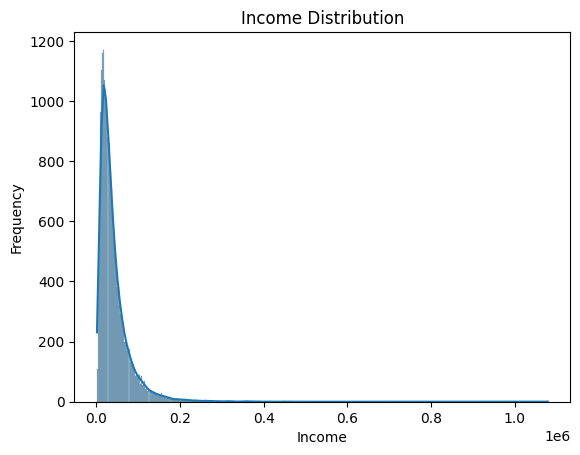

In [ ]:

sns.histplot(df['Income'], kde=True)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()


# K-Means Clustering of Income and Disposable Income

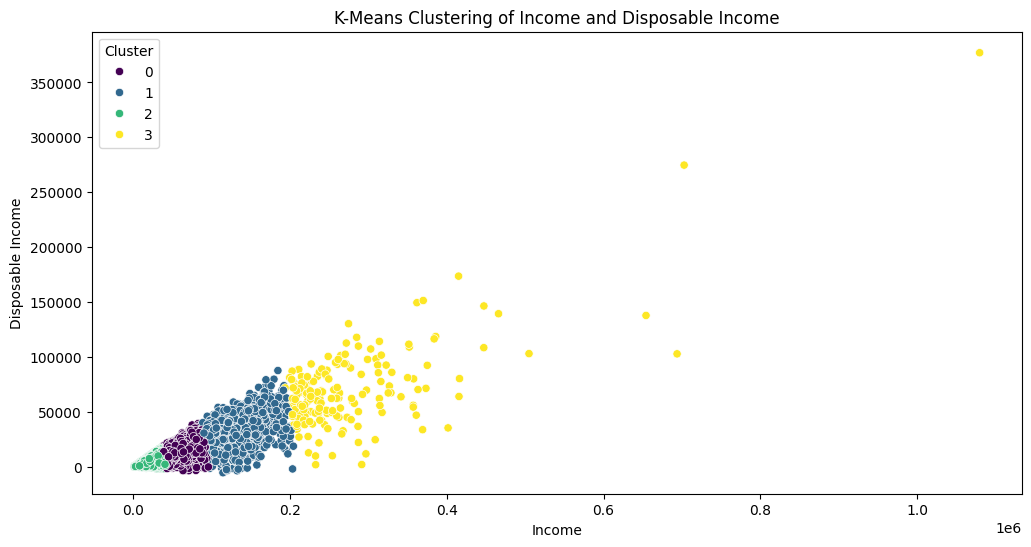

In [ ]:
from sklearn.cluster import KMeans

clustering_columns = ['Income', 'Disposable_Income', 'Desired_Savings_Percentage']
df_clustering = df[clustering_columns].dropna()

kmeans = KMeans(n_clusters=4, random_state=0)
df_clustering['Cluster'] = kmeans.fit_predict(df_clustering)

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Income', y='Disposable_Income', hue='Cluster', palette='viridis', data=df_clustering)
plt.title('K-Means Clustering of Income and Disposable Income')
plt.xlabel('Income')
plt.ylabel('Disposable Income')
plt.show()


Observation:

The most of the salary depends on the 10,000 to 25,000 avg so the cluster presence is high on the 0.0 to 0.2 and more.

after that the values are getting lower so the bond between the clusters are reduced.


# ScatterPlot for Income VS Savings

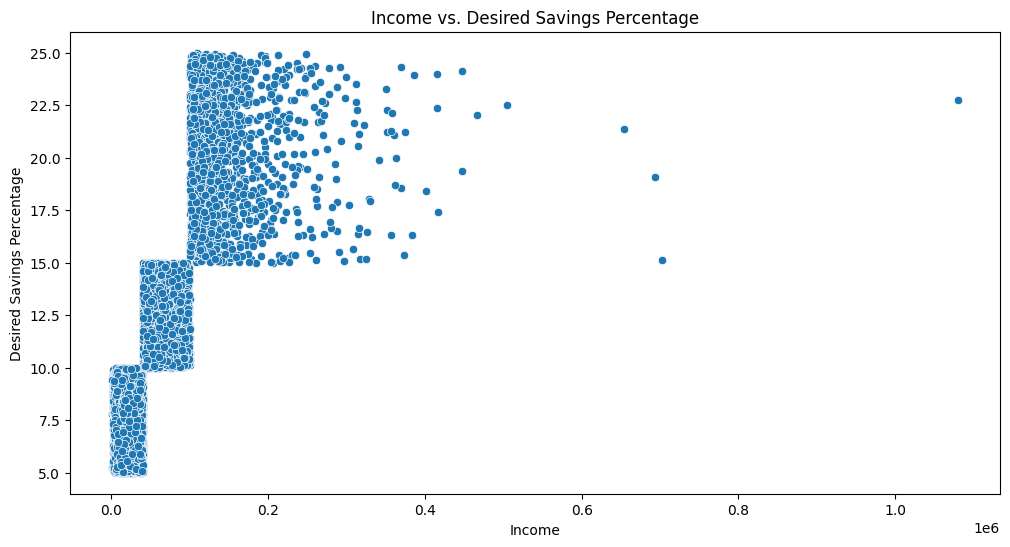

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Income', y='Desired_Savings_Percentage', data=df)
plt.title('Income vs. Desired Savings Percentage')
plt.xlabel('Income')
plt.ylabel('Desired Savings Percentage')
plt.show()


Observation:

This scatter plot shows that the min salary people try to save the money most so the clusters presences are so tight in the plot.
the people who highly paid above 20,000 are not that much prefferd to save thair money

# Box plot for City_Tier by Expenses 

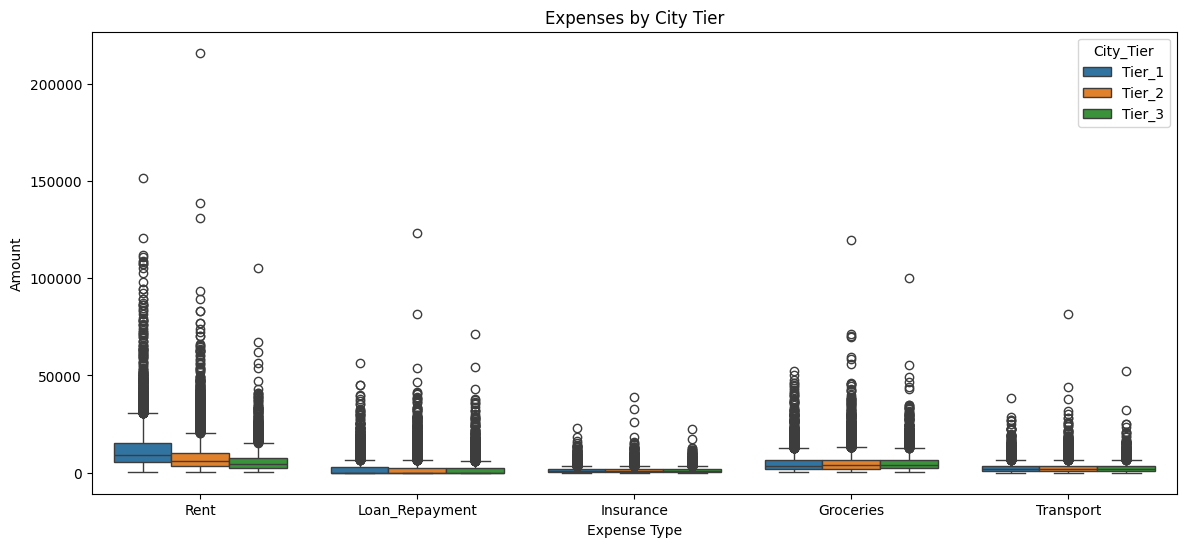

In [ ]:
plt.figure(figsize=(14, 6))
expense_columns = ['Rent', 'Loan_Repayment', 'Insurance', 'Groceries', 'Transport']
df_melted = df.melt(id_vars='City_Tier', value_vars=expense_columns, var_name='Expense', value_name='Amount')
sns.boxplot(x='Expense', y='Amount', hue='City_Tier', data=df_melted)
plt.title('Expenses by City Tier')
plt.xlabel('Expense Type')
plt.ylabel('Amount')
plt.show()


Observation:

The box plot shows that the major amount spend by the all people from all City_Tier are in "RENTS",
followed by "GROCERIES" and "LOAN".

The spend money on "TRANSPORT" more than the "INSURANCE"

The people least spend on their Insurance which is not benificial for their life.

RENT = AVG = 10000, MAX = 100000 (This is an outlyer, may be the cost of living in that country may be high)
GROCERIES = AVG = 5000, MAX = 50000 (This may also be an outlyer)
LOAN =  AVG = 2000, MAX = 20000 (This may also be an outlyer)
TRANSPORT = AVG = 1000, MAX = 10000 (This is not an outlyer)
INSURANCE = AVG = 500, MAX = 5000 (This is not an outlyer)




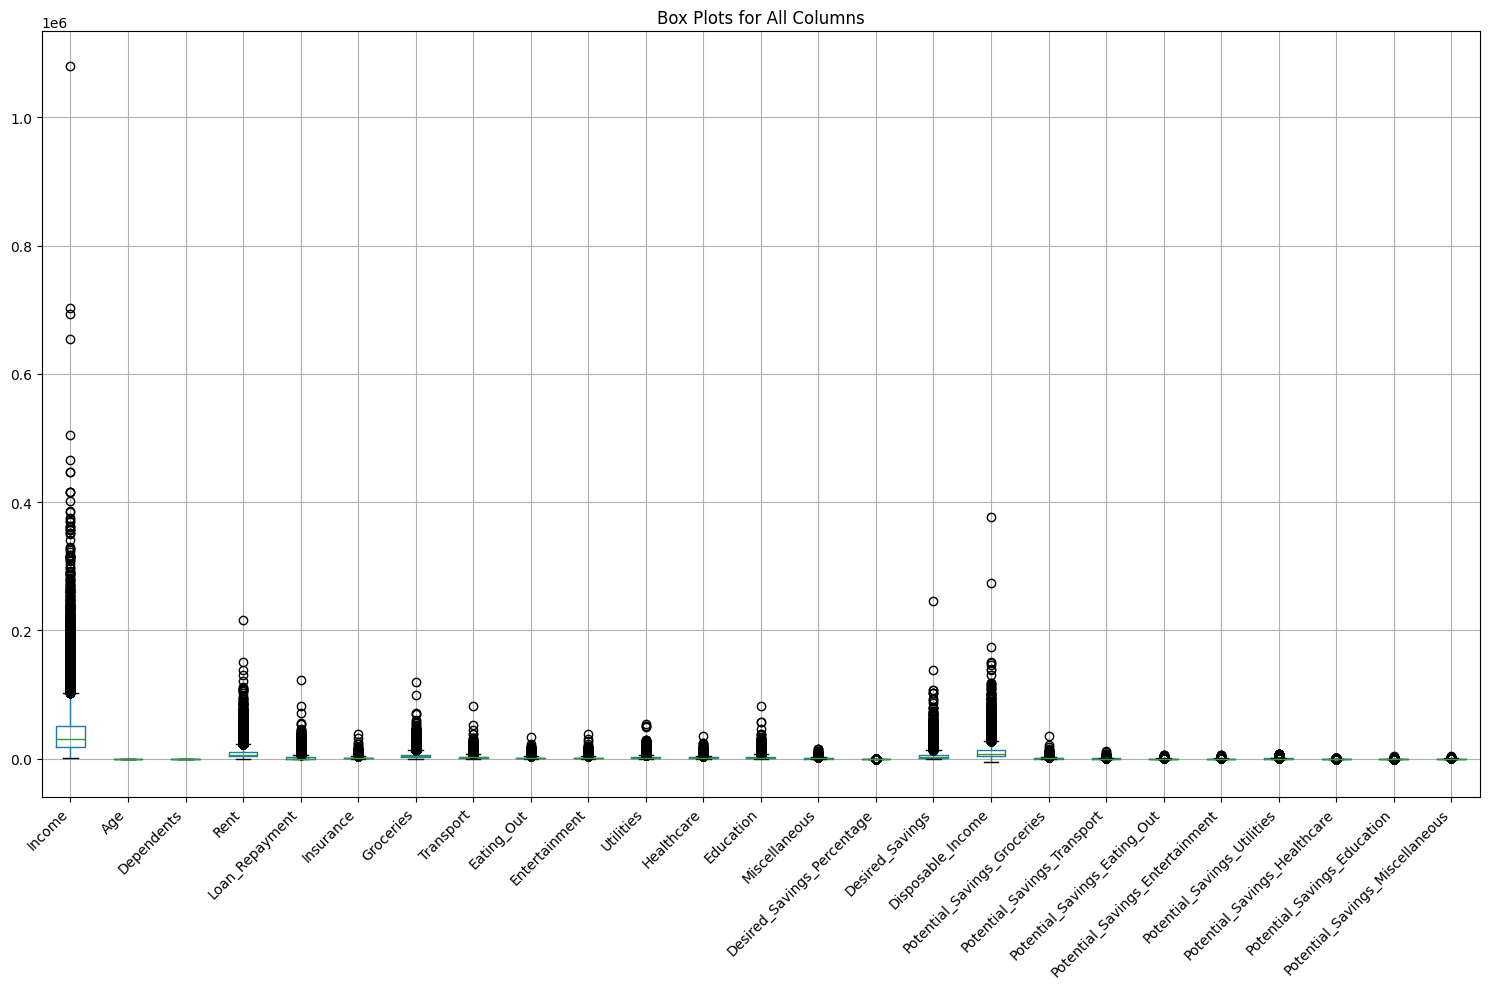

In [ ]:
numerical_cols = df.select_dtypes(include=['float', 'int']).columns
plt.figure(figsize=(15, 10))
df.boxplot(column=list(numerical_cols))
plt.xticks(rotation=45, ha='right')
plt.title('Box Plots for All Columns')
plt.tight_layout()
plt.show()

In [ ]:
df.columns

Index(['Income', 'Age', 'Dependents', 'Occupation', 'City_Tier', 'Rent',
       'Loan_Repayment', 'Insurance', 'Groceries', 'Transport', 'Eating_Out',
       'Entertainment', 'Utilities', 'Healthcare', 'Education',
       'Miscellaneous', 'Desired_Savings_Percentage', 'Desired_Savings',
       'Disposable_Income', 'Potential_Savings_Groceries',
       'Potential_Savings_Transport', 'Potential_Savings_Eating_Out',
       'Potential_Savings_Entertainment', 'Potential_Savings_Utilities',
       'Potential_Savings_Healthcare', 'Potential_Savings_Education',
       'Potential_Savings_Miscellaneous'],
      dtype='object')

# To remove Outliers

In [ ]:
print(df.columns.tolist())


['Income', 'Age', 'Dependents', 'Occupation', 'City_Tier', 'Rent', 'Loan_Repayment', 'Insurance', 'Groceries', 'Transport', 'Eating_Out', 'Entertainment', 'Utilities', 'Healthcare', 'Education', 'Miscellaneous', 'Desired_Savings_Percentage', 'Desired_Savings', 'Disposable_Income', 'Potential_Savings_Groceries', 'Potential_Savings_Transport', 'Potential_Savings_Eating_Out', 'Potential_Savings_Entertainment', 'Potential_Savings_Utilities', 'Potential_Savings_Healthcare', 'Potential_Savings_Education', 'Potential_Savings_Miscellaneous']


In [ ]:
import pandas as pd

df.columns = df.columns.str.strip()

print("Normalized DataFrame Columns:")
print(df.columns.tolist())

numerical_columns = [
    'Income', 'Age', 'Dependents', 'Rent', 'Loan_Repayment', 
    'Insurance', 'Groceries', 'Transport', 'Eating_Out', 
    'Entertainment', 'Utilities', 'Healthcare', 'Education', 
    'Miscellaneous', 'Desired_Savings_Percentage', 
    'Disposable_Income', 'Total_Expenses', 
    'Savings', 'Total_Potential_Savings'
]

def remove_outliers_iqr(df, column):

    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

for column in numerical_columns:
    try:
        df = remove_outliers_iqr(df, column)
    except KeyError:
        print(f"Column '{column}' not found in DataFrame.")
        
print("Data without Outliers:")
print(df)


Normalized DataFrame Columns:
['Income', 'Age', 'Dependents', 'Occupation', 'City_Tier', 'Rent', 'Loan_Repayment', 'Insurance', 'Groceries', 'Transport', 'Eating_Out', 'Entertainment', 'Utilities', 'Healthcare', 'Education', 'Miscellaneous', 'Desired_Savings_Percentage', 'Desired_Savings', 'Disposable_Income', 'Potential_Savings_Groceries', 'Potential_Savings_Transport', 'Potential_Savings_Eating_Out', 'Potential_Savings_Entertainment', 'Potential_Savings_Utilities', 'Potential_Savings_Healthcare', 'Potential_Savings_Education', 'Potential_Savings_Miscellaneous']
Column 'Total_Expenses' not found in DataFrame.
Column 'Savings' not found in DataFrame.
Column 'Total_Potential_Savings' not found in DataFrame.
Data without Outliers:
             Income  Age  Dependents     Occupation City_Tier         Rent  \
1      26858.596592   34           2        Retired    Tier_2  5371.719318   
4      24875.283548   52           4   Professional    Tier_2  4975.056710   
5      24875.610267   57   

Observation:

This steps helps to clean the data from outliers.

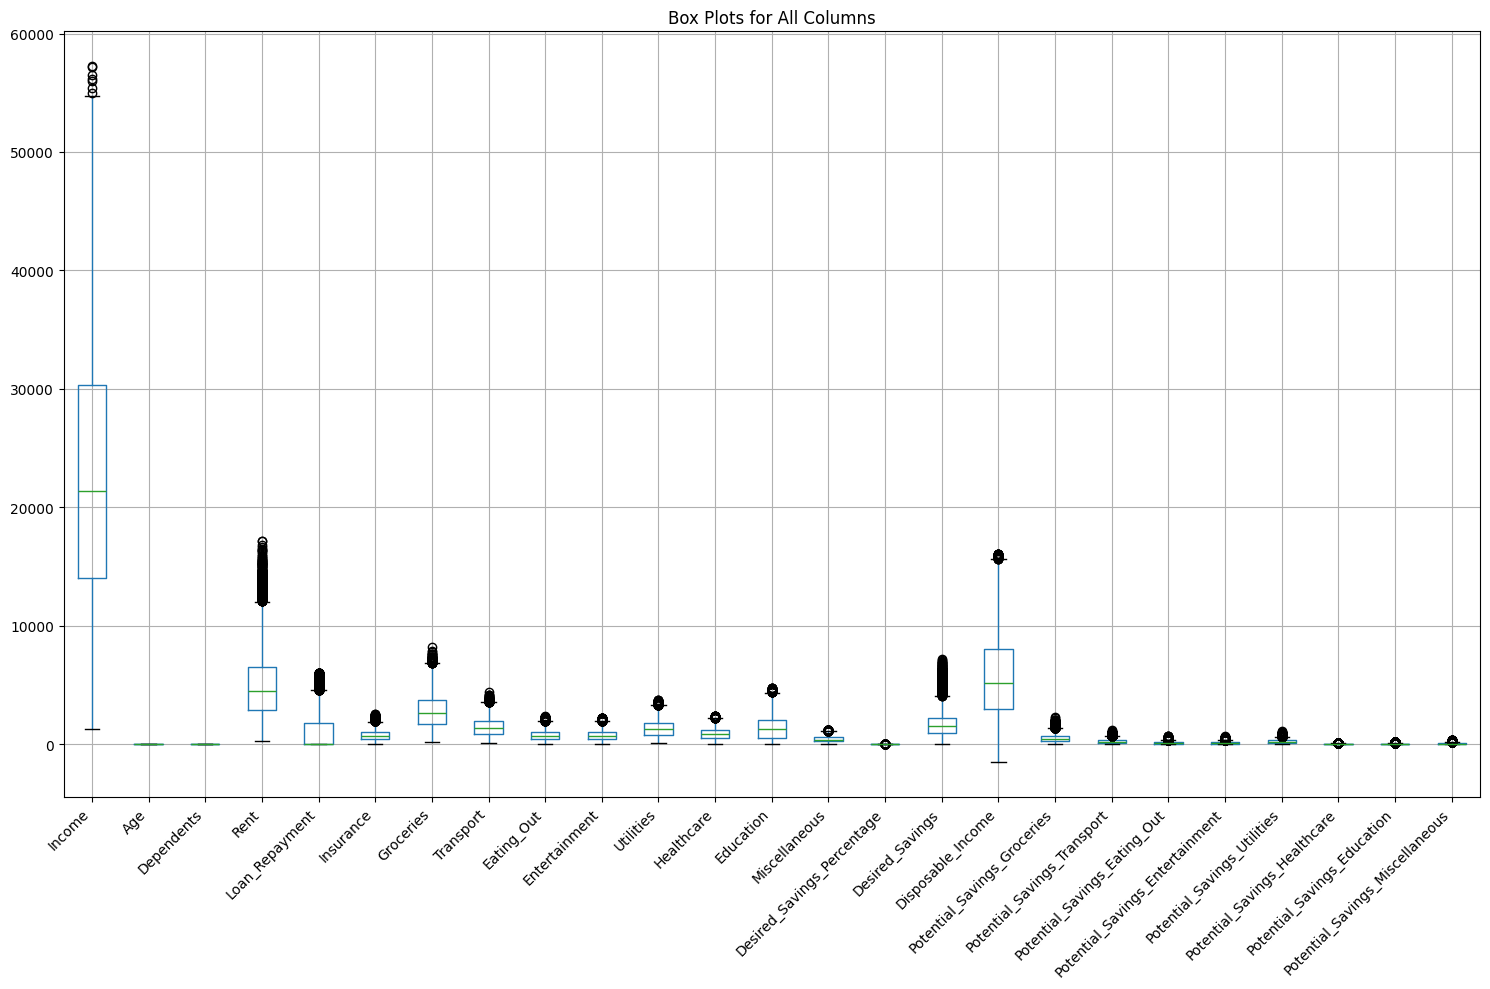

In [ ]:
numerical_cols = df.select_dtypes(include=['float', 'int']).columns
plt.figure(figsize=(15, 10))
df.boxplot(column=list(numerical_cols))
plt.xticks(rotation=45, ha='right')
plt.title('Box Plots for All Columns')
plt.tight_layout()
plt.show()

# Box plot for City_Tier by Expenses  After removing the clusters

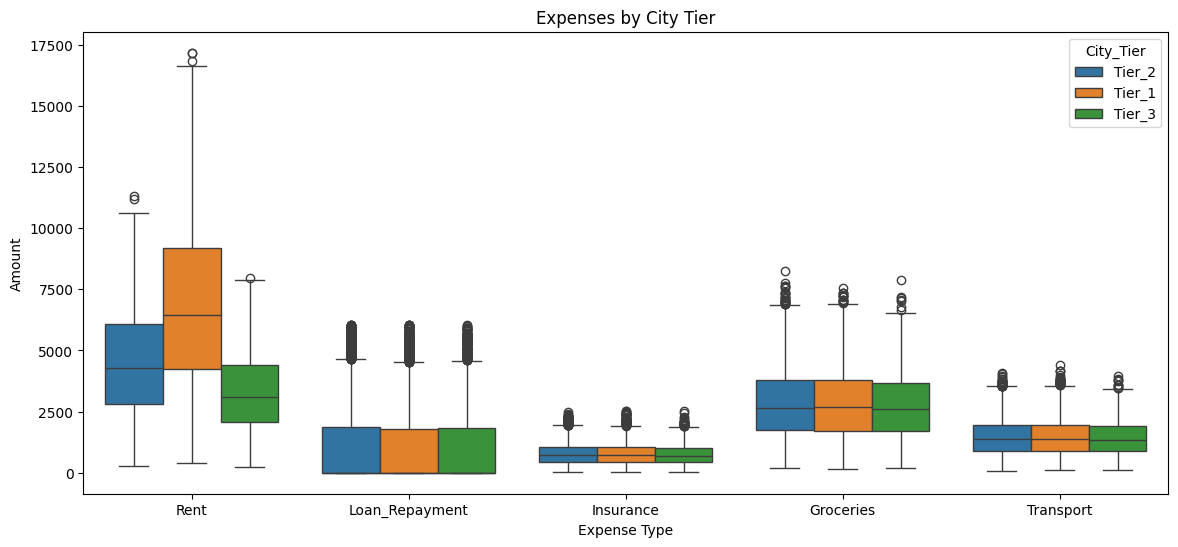

In [ ]:
plt.figure(figsize=(14, 6))
expense_columns = ['Rent', 'Loan_Repayment', 'Insurance', 'Groceries', 'Transport']
df_melted = df.melt(id_vars='City_Tier', value_vars=expense_columns, var_name='Expense', value_name='Amount')
sns.boxplot(x='Expense', y='Amount', hue='City_Tier', data=df_melted)
plt.title('Expenses by City Tier')
plt.xlabel('Expense Type')
plt.ylabel('Amount')
plt.show()


Observation:

After cleaning the outliers.

# Bar Chart for Avg Income by Occupation

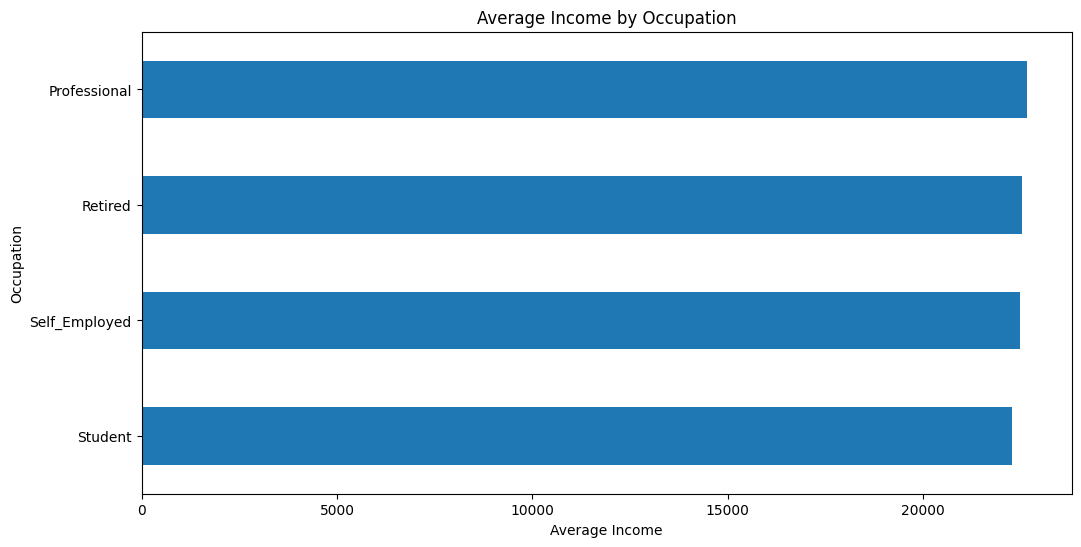

In [ ]:
plt.figure(figsize=(12, 6))
avg_income_by_occupation = df.groupby('Occupation')['Income'].mean().sort_values()
avg_income_by_occupation.plot(kind='barh')
plt.title('Average Income by Occupation')
plt.xlabel('Average Income')
plt.ylabel('Occupation')
plt.show()


# Scatter Plot for Age by Income

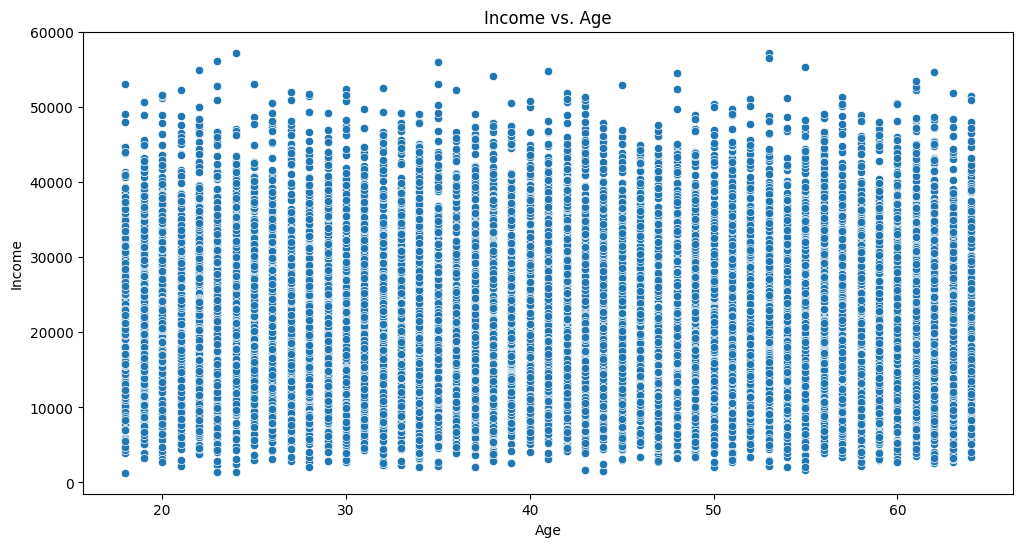

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['Age'], y=df['Income'])
plt.title('Income vs. Age')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()


# Bar Chart for Potential Savings vs Income

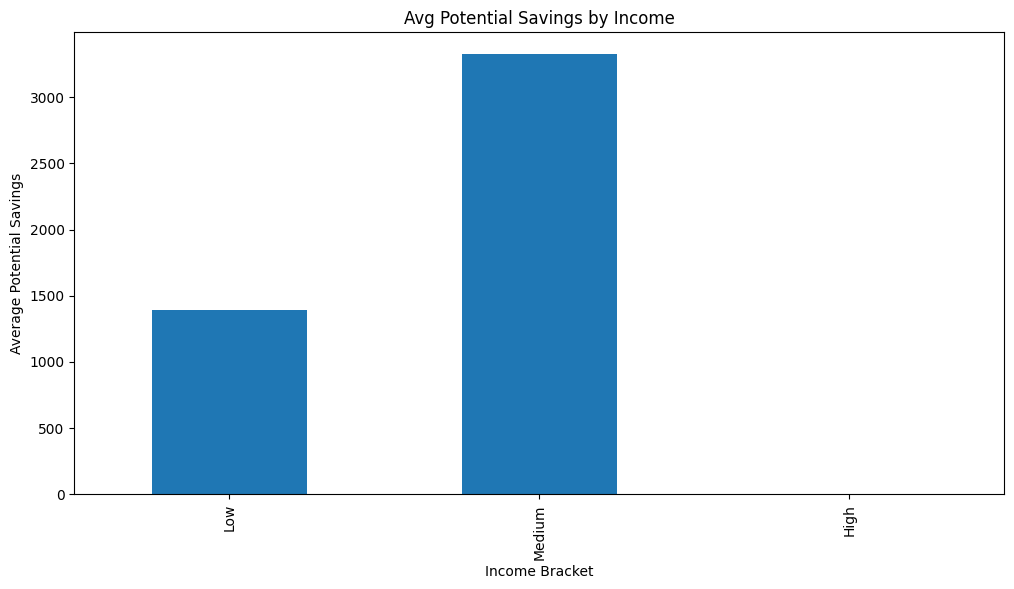

In [ ]:
required_columns = [
    'Potential_Savings_Groceries', 'Potential_Savings_Transport', 'Potential_Savings_Eating_Out', 
    'Potential_Savings_Entertainment', 'Potential_Savings_Utilities', 'Potential_Savings_Healthcare', 
    'Potential_Savings_Education', 'Potential_Savings_Miscellaneous', 'Income'
]

for col in required_columns:
    if col not in df.columns:
        print(f"Column '{col}' is missing in the DataFrame.")

if all(col in df.columns for col in required_columns):
    df['Total_Potential_Savings'] = df[
        ['Potential_Savings_Groceries', 'Potential_Savings_Transport', 
         'Potential_Savings_Eating_Out', 'Potential_Savings_Entertainment', 
         'Potential_Savings_Utilities', 'Potential_Savings_Healthcare', 
         'Potential_Savings_Education', 'Potential_Savings_Miscellaneous']
    ].sum(axis=1)

    if 'Income_Bracket' not in df.columns:
        df['Income_Bracket'] = pd.cut(
            df['Income'], 
            bins=[0, 50000, 100000, float('inf')], 
            labels=['Low', 'Medium', 'High']
        )

    potential_savings_by_income = df.groupby('Income_Bracket')['Total_Potential_Savings'].mean()

    potential_savings_by_income.plot(kind='bar', figsize=(12, 6))
    plt.title('Avg Potential Savings by Income')
    plt.xlabel('Income Bracket')
    plt.ylabel('Average Potential Savings')
    plt.show()

# Bar chart for Income vs Individuals

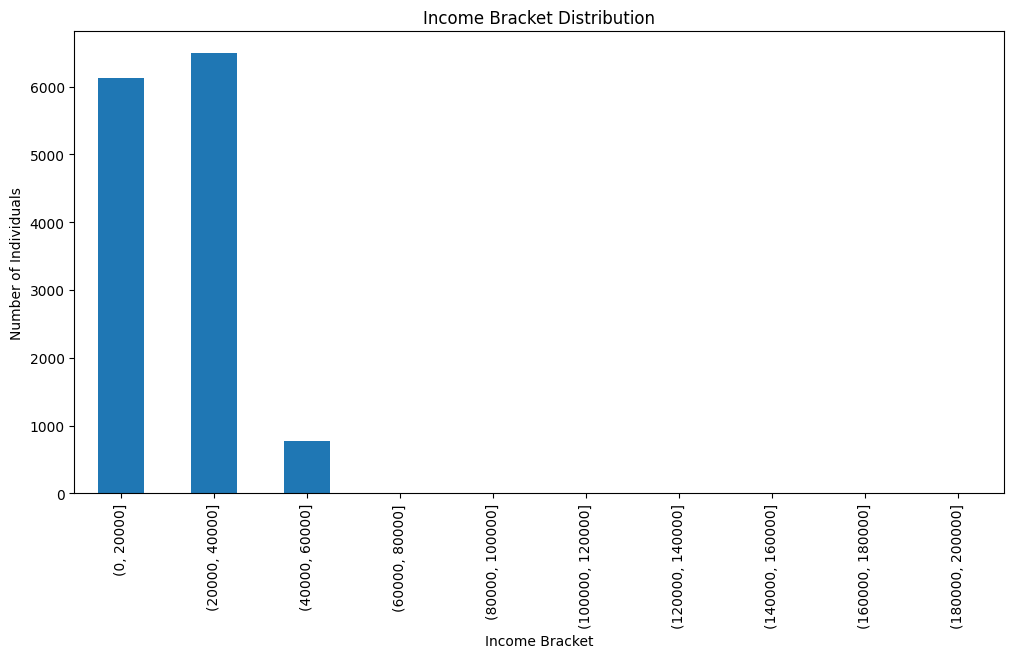

In [ ]:
income_brackets = [0, 20000, 40000, 60000, 80000, 100000, 120000, 140000, 160000, 180000, 200000]
df['Income_Bracket'] = pd.cut(df['Income'], bins=income_brackets)

income_bracket_distribution = df['Income_Bracket'].value_counts().sort_index()

income_bracket_distribution.plot(kind='bar', figsize=(12, 6))
plt.title('Income Bracket Distribution')
plt.xlabel('Income Bracket')
plt.ylabel('Number of Individuals')
plt.show()


In [ ]:

df['Total_Expenses'] = df[['Rent', 'Loan_Repayment', 'Insurance', 'Groceries', 'Transport',
                           'Eating_Out', 'Entertainment', 'Utilities', 'Healthcare', 
                           'Education', 'Miscellaneous']].sum(axis=1)
df['Savings'] = df['Income'] - df['Total_Expenses']

# Box Plot for Total expenses vs Occupation

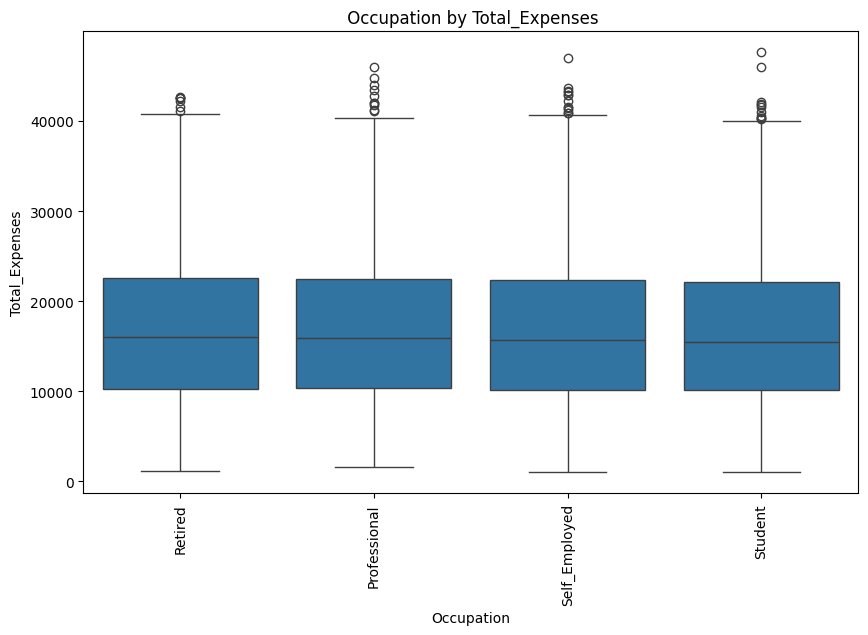

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Occupation', y='Total_Expenses', data=df)
plt.title(' Occupation by Total_Expenses')
plt.xlabel('Occupation')
plt.ylabel('Total_Expenses')
plt.xticks(rotation=90)
plt.show()

# Histograph for Income vs users

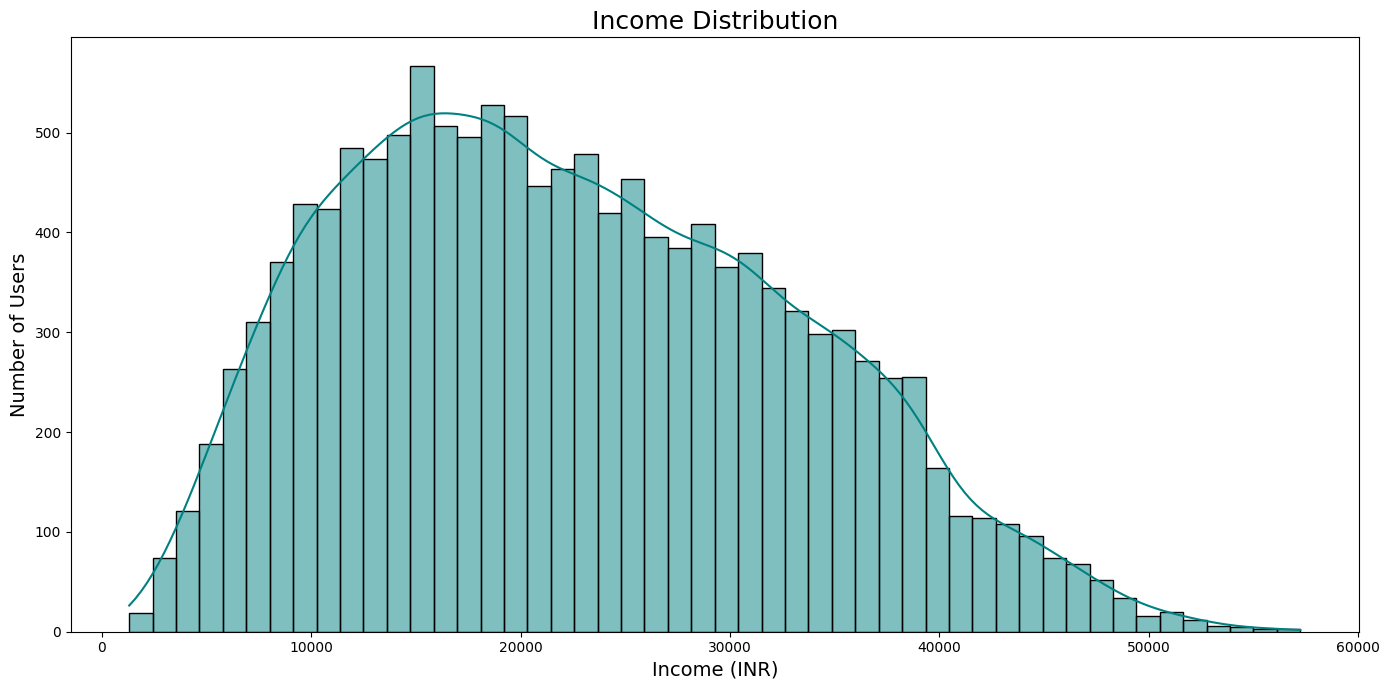

In [ ]:
plt.figure(figsize=(14, 7))
sns.histplot(df['Income'], bins=50, kde=True, color='teal')
plt.title('Income Distribution', fontsize=18)
plt.xlabel('Income (INR)', fontsize=14)
plt.ylabel('Number of Users', fontsize=14)
plt.tight_layout()
plt.show()

# Histogram for Age distribution vs no.of.users

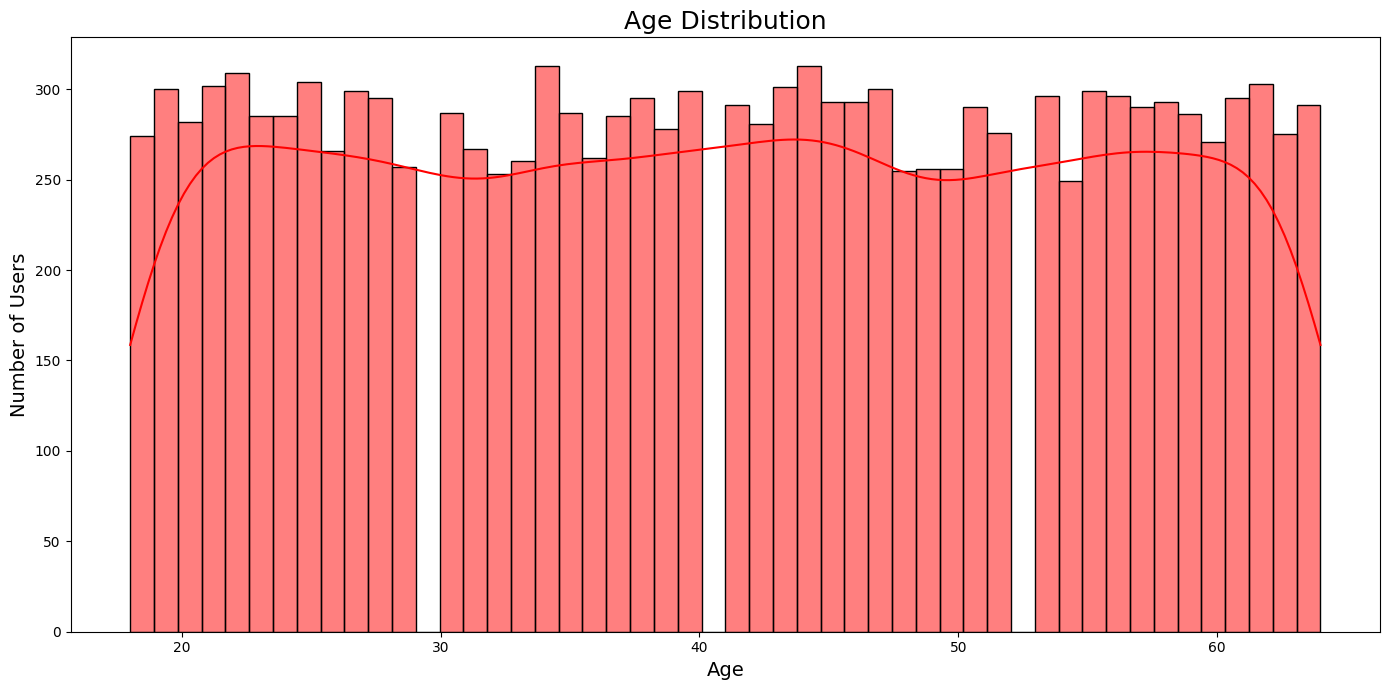

In [ ]:
plt.figure(figsize=(14, 7))
sns.histplot(df['Age'], bins=50, kde=True, color='red')
plt.title('Age Distribution', fontsize=18)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Number of Users', fontsize=14)
plt.tight_layout()
plt.show()

# Bar chart for City_Tier vs no.of users

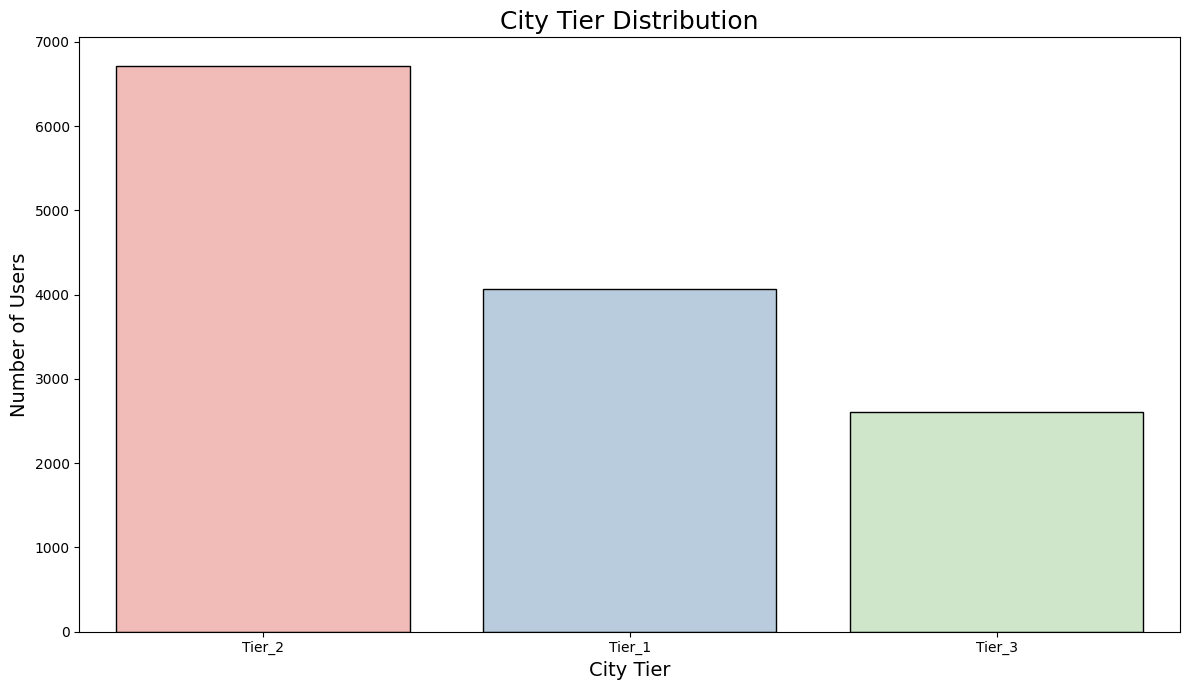

In [ ]:
plt.figure(figsize=(12, 7))
sns.countplot(x='City_Tier', data=df, palette='Pastel1', edgecolor='black')
plt.title('City Tier Distribution', fontsize=18)
plt.xlabel('City Tier', fontsize=14)
plt.ylabel('Number of Users', fontsize=14)
plt.tight_layout()
plt.show()

# Histogram for fixed_expenses vs users

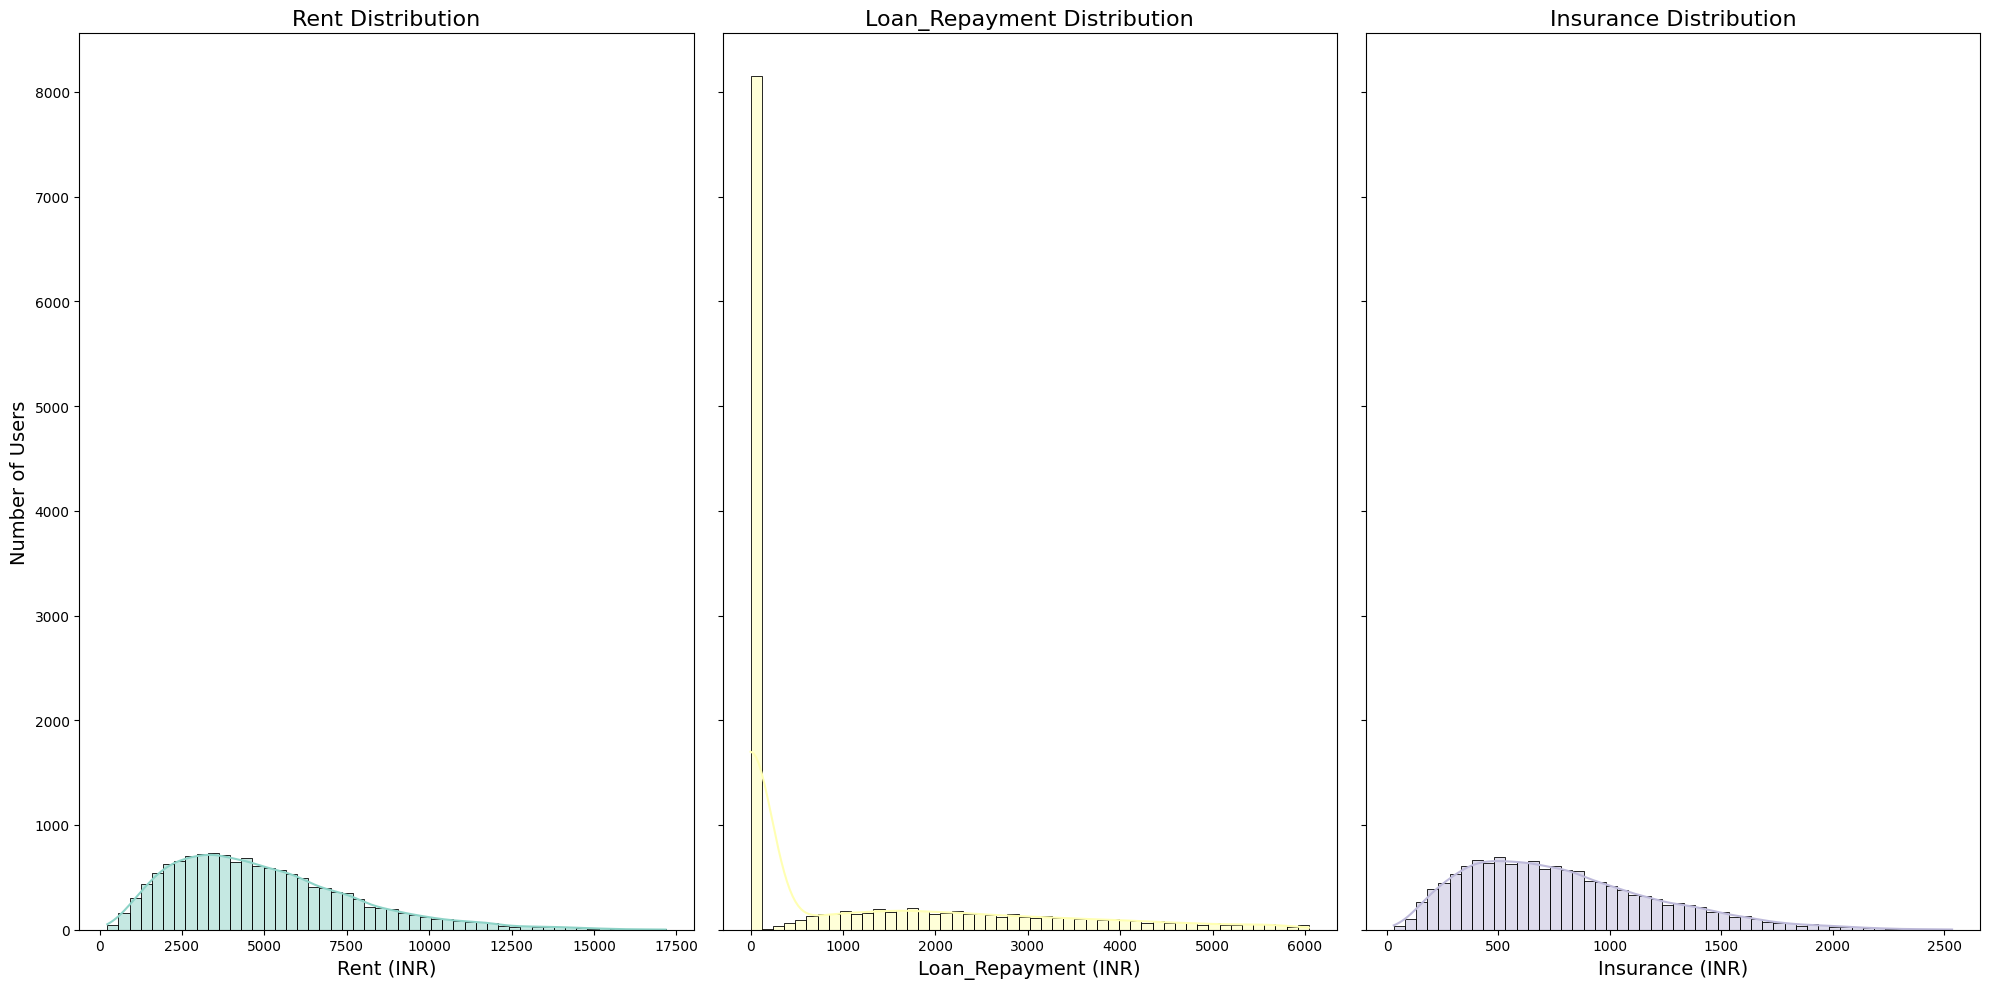

In [ ]:
fixed_expenses = ['Rent', 'Loan_Repayment', 'Insurance']
num_fixed = len(fixed_expenses)

fixed_palette = sns.color_palette("Set3", num_fixed)

fig, axes = plt.subplots(1, num_fixed, figsize=(20, 10), sharey=True)

for ax, expense, color in zip(axes, fixed_expenses, fixed_palette):
    sns.histplot(df[expense], bins=50, kde=True, color=color, ax=ax)
    ax.set_title(f'{expense} Distribution', fontsize=16)
    ax.set_xlabel(f'{expense} (INR)', fontsize=14)
    ax.set_ylabel('Number of Users', fontsize=14)

plt.tight_layout()
plt.show()

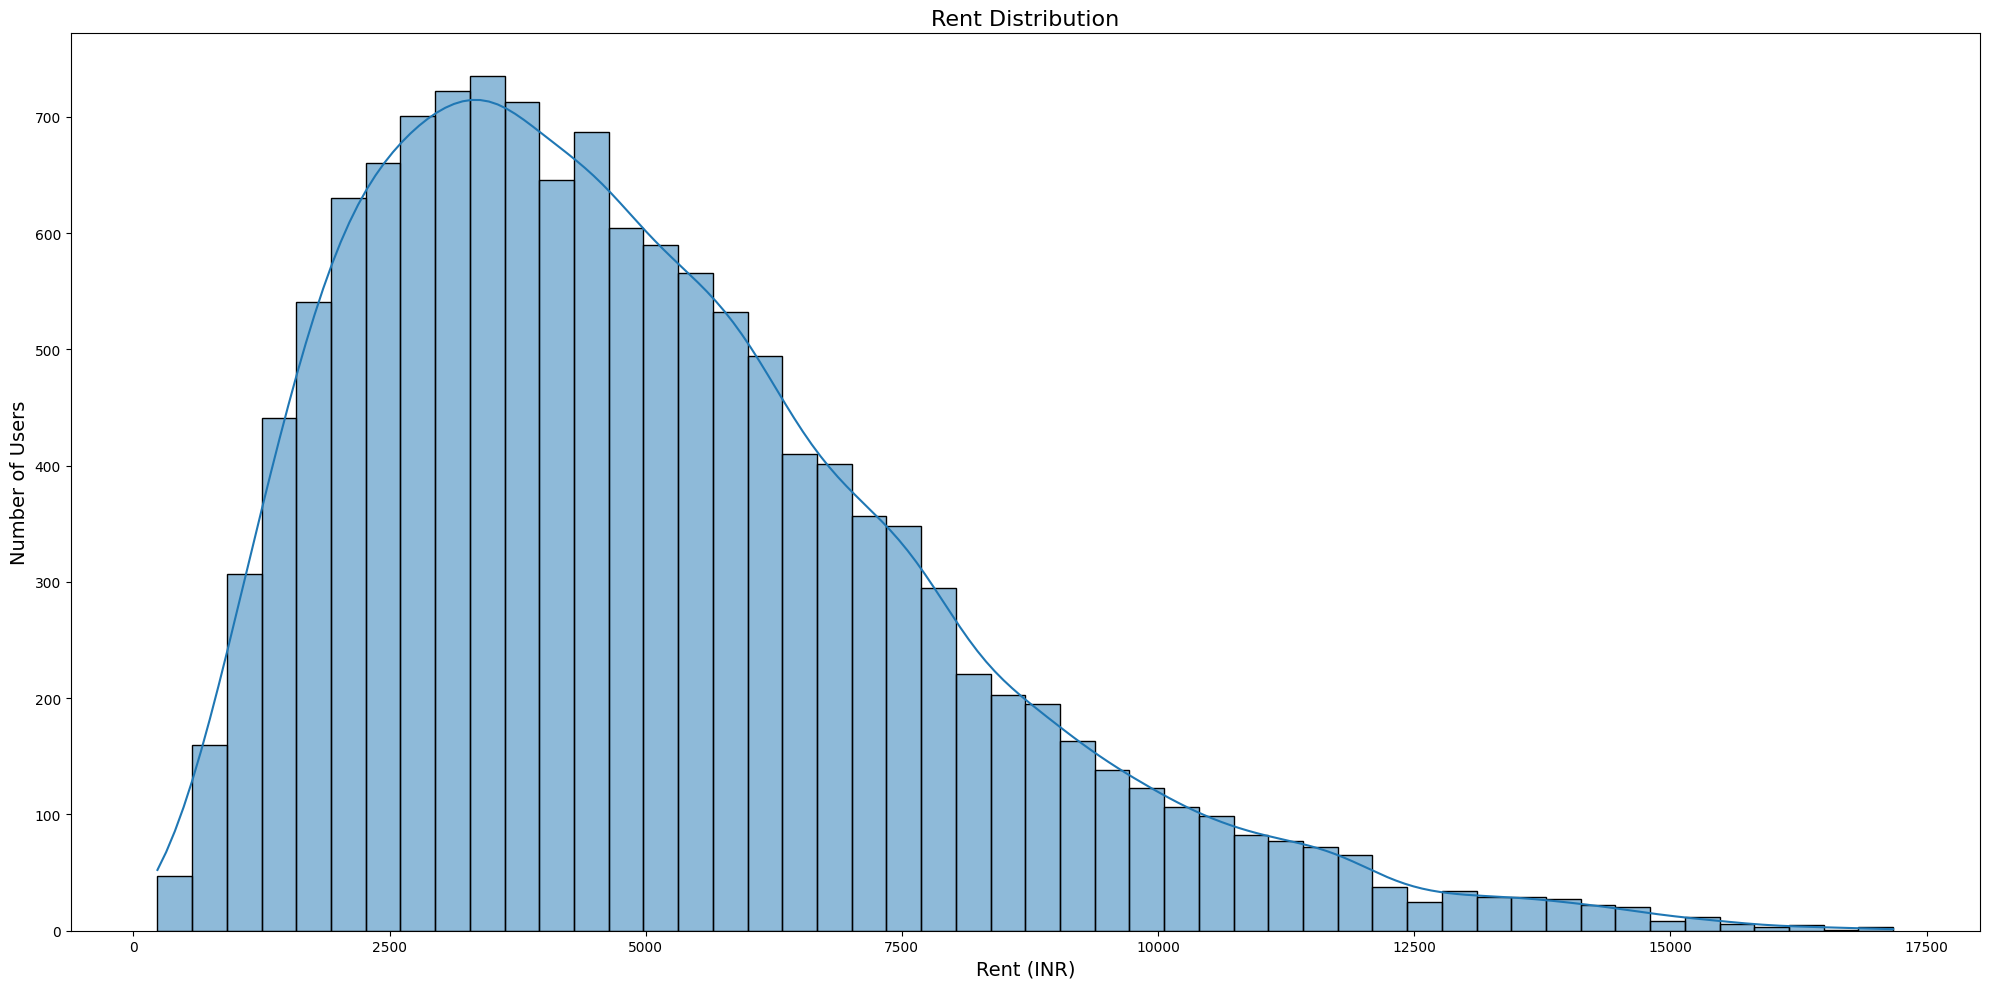

In [ ]:
fixed_expenses = ['Rent', 'Loan_Repayment', 'Insurance']
fixed_palette = sns.color_palette("tab10")

fig, ax = plt.subplots(figsize=(20, 10))

sns.histplot(df[fixed_expenses[0]], bins=50, kde=True, color=fixed_palette[0], ax=ax)
ax.set_title(f'{fixed_expenses[0]} Distribution', fontsize=16)
ax.set_xlabel(f'{fixed_expenses[0]} (INR)', fontsize=14)
ax.set_ylabel('Number of Users', fontsize=14)

plt.tight_layout()
plt.show()


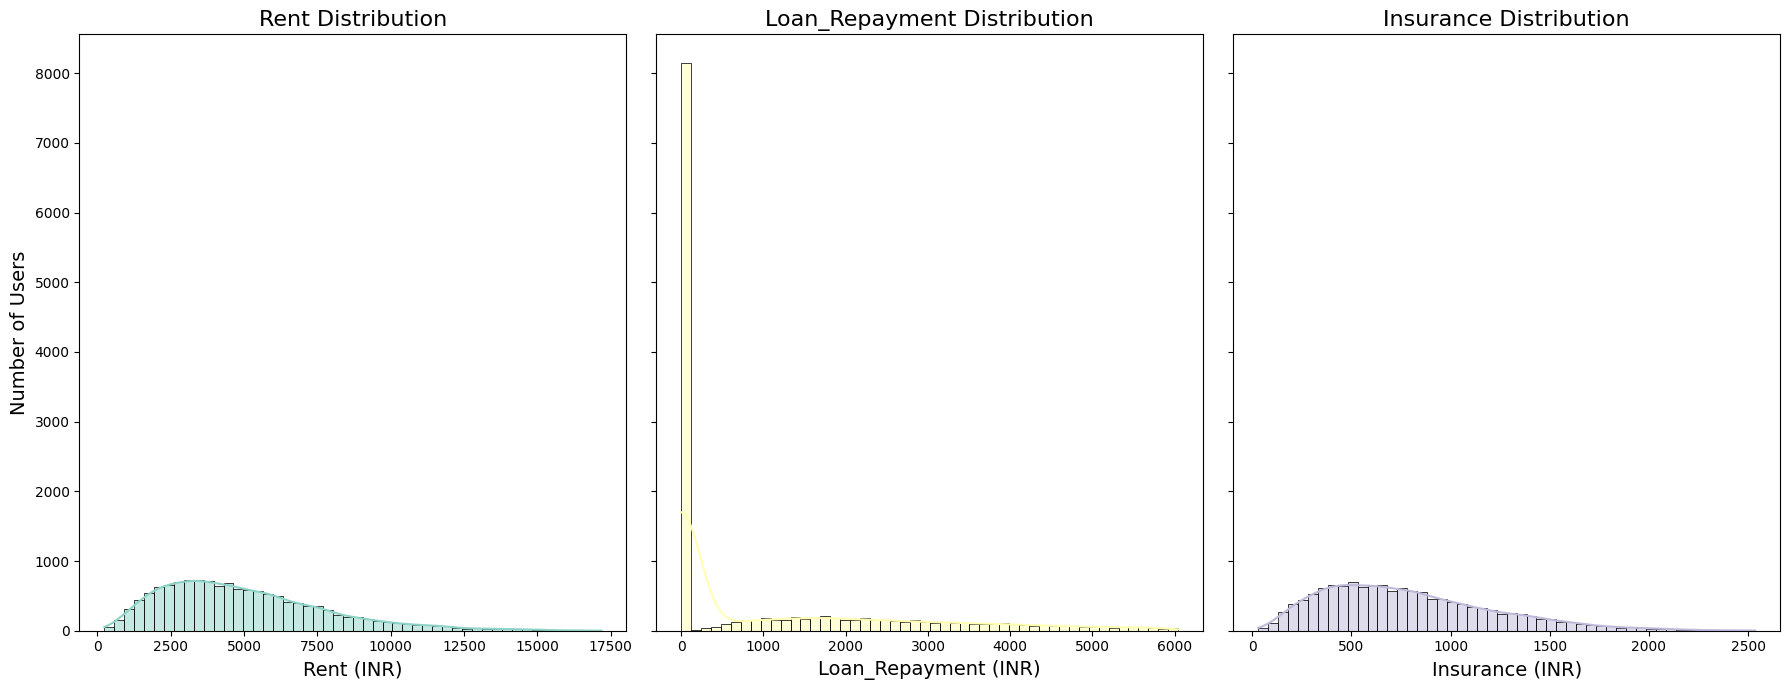

In [ ]:
fixed_expenses = ['Rent', 'Loan_Repayment', 'Insurance']
num_fixed = len(fixed_expenses)

fixed_palette = sns.color_palette("Set3", num_fixed)

fig, axes = plt.subplots(1, num_fixed, figsize=(18, 7), sharey=True)

for ax, expense, color in zip(axes, fixed_expenses, fixed_palette):
    sns.histplot(df[expense], bins=50, kde=True, color=color, ax=ax)
    ax.set_title(f'{expense} Distribution', fontsize=16)
    ax.set_xlabel(f'{expense} (INR)', fontsize=14)
    ax.set_ylabel('Number of Users', fontsize=14)

plt.tight_layout()
plt.show()

# Histogram for variable_expenses vs users

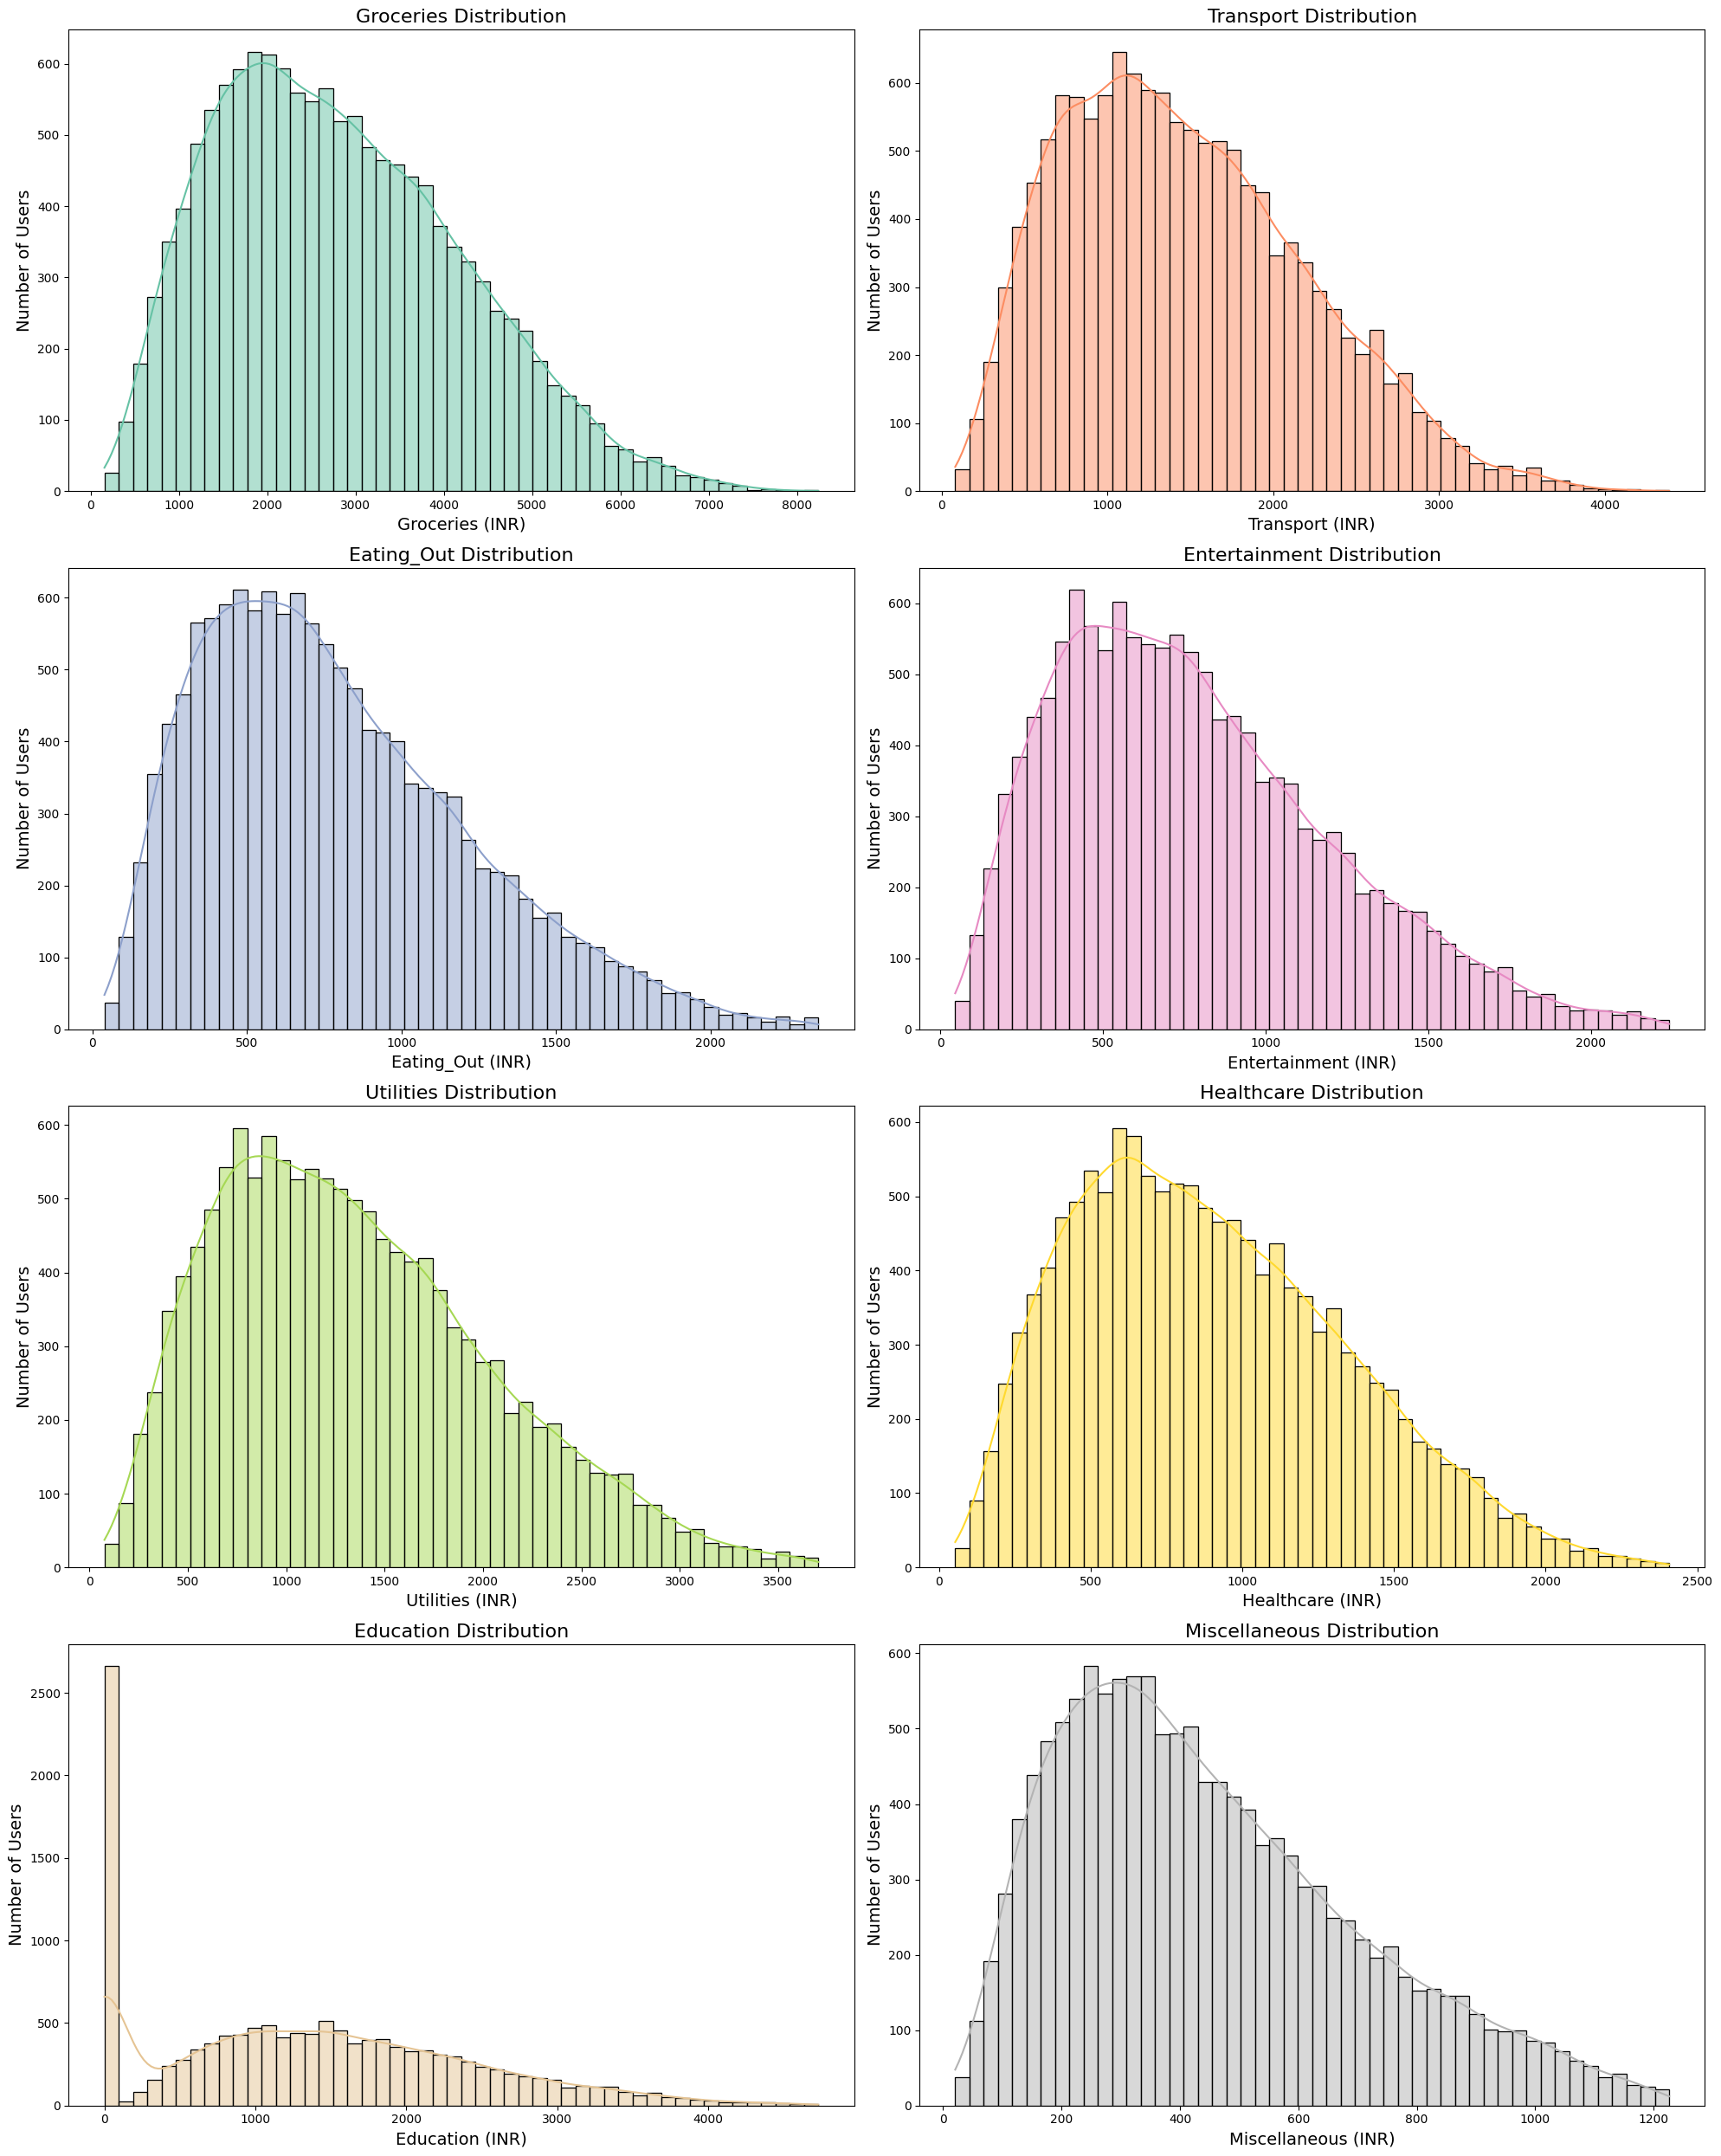

In [ ]:
variable_expenses = [
    'Groceries', 'Transport', 'Eating_Out', 'Entertainment',
    'Utilities', 'Healthcare', 'Education', 'Miscellaneous'
]
num_variable = len(variable_expenses)

# Define color palette for the plots
variable_palette = sns.color_palette("Set2", num_variable)

# Create subplots
fig, axes = plt.subplots(4, 2, figsize=(20, 25))
axes = axes.flatten()  # Flatten to easily iterate through

# Generate histograms with KDE for each variable expense
for ax, expense, color in zip(axes, variable_expenses, variable_palette):
    sns.histplot(df[expense], bins=50, kde=True, color=color, ax=ax)
    ax.set_title(f'{expense} Distribution', fontsize=16)
    ax.set_xlabel(f'{expense} (INR)', fontsize=14)
    ax.set_ylabel('Number of Users', fontsize=14)

plt.tight_layout()
plt.show()


Observation:

For Groceries people spend money from 1000 to 2500.

For Travel people spend money from 800 to 1800.

For Entertainment people spend money from 400 to 1000.

For Eating Out people spend money from 250 to 800.

For Urilities people spend money from 500 to 1500.

For Healthcare people spend money from 350 to 1300.

For Miscellaneous people spend money from 200 to 600.

For Education people spend money from 1000 to 1500.

These are the hig amount spent by peoples for different categories. 

# Heat map 

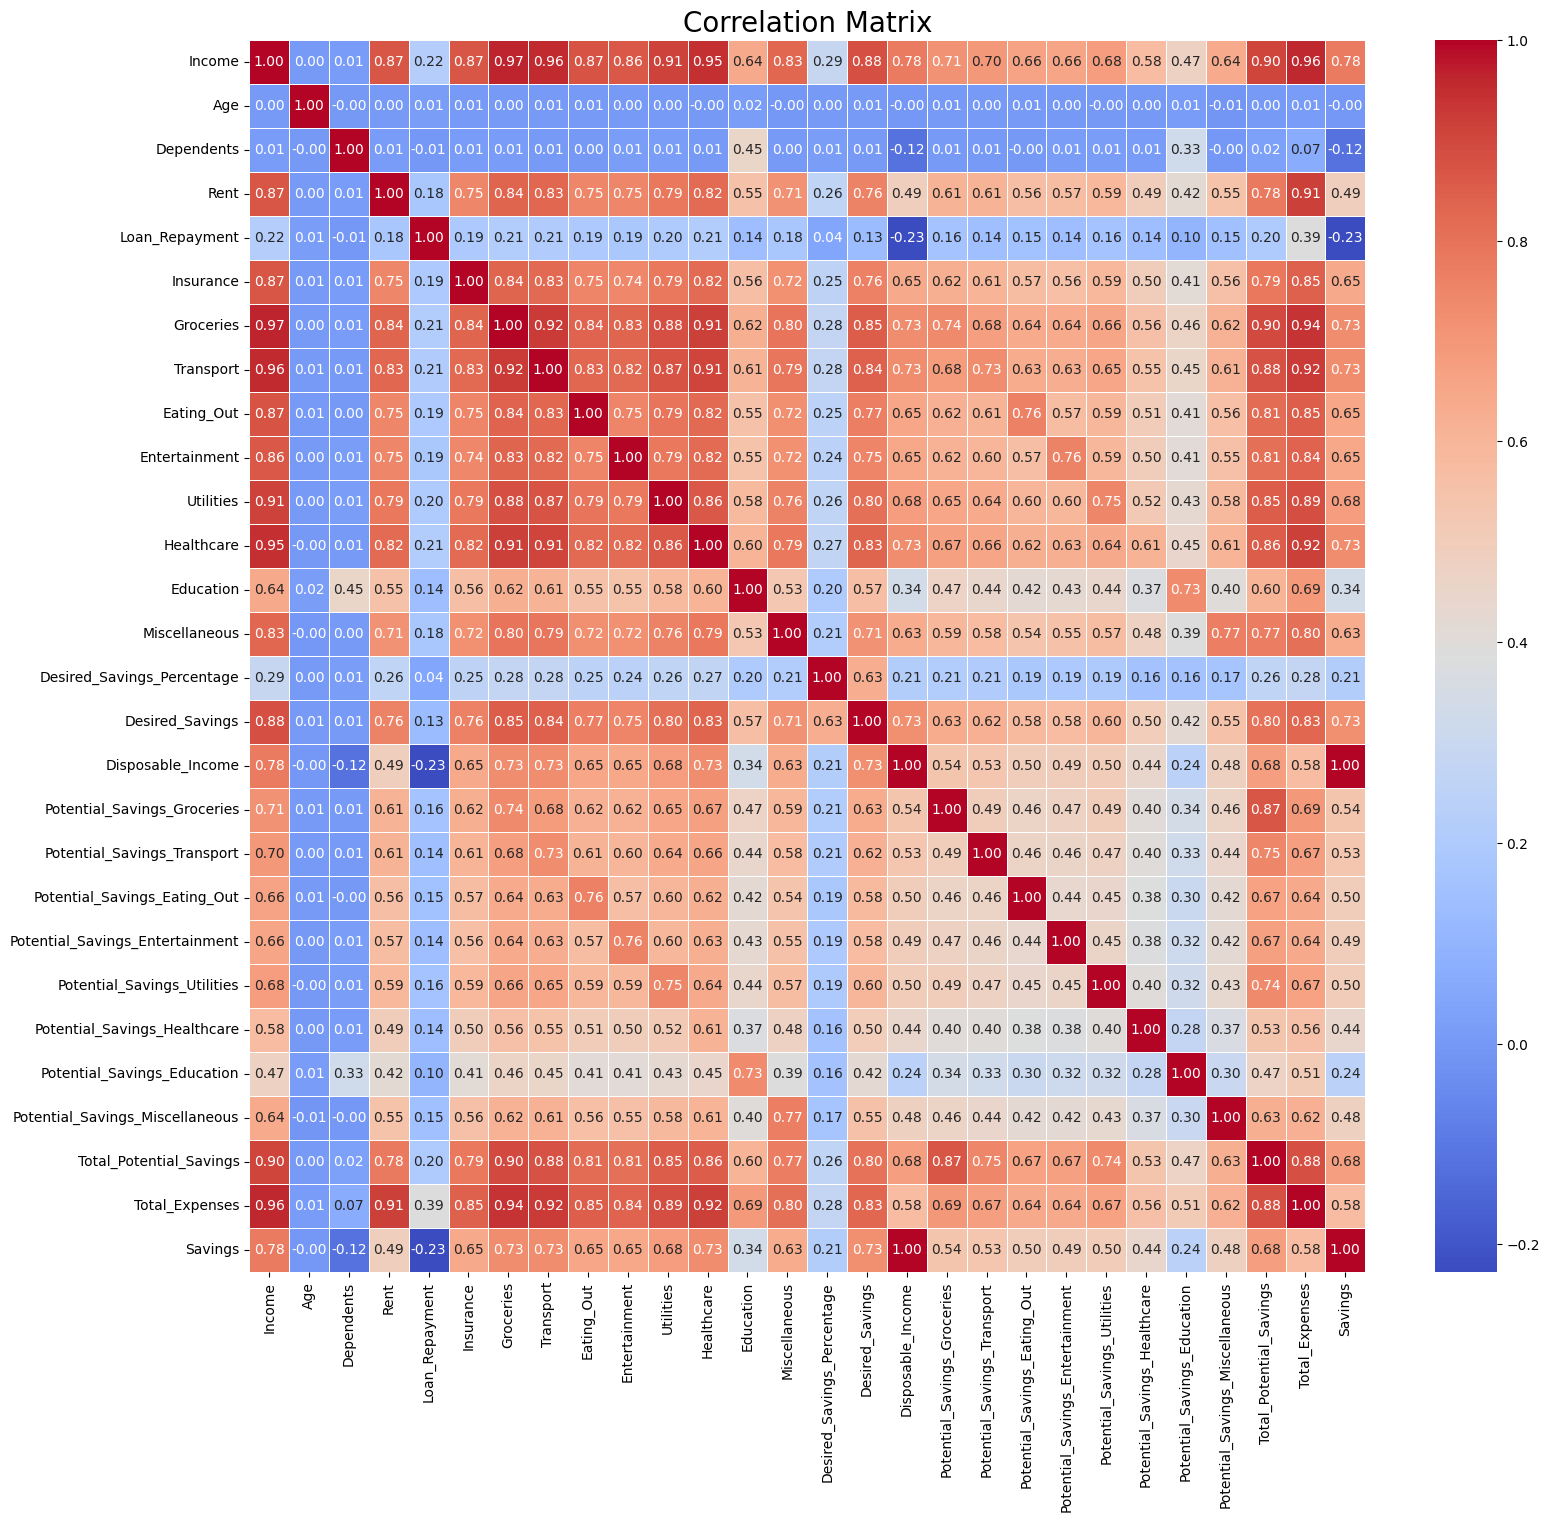

In [ ]:


numeric_df = df.select_dtypes(include=[np.number])

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(18, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Matrix', fontsize=20)
plt.show()


# Data Preprocessing 

Feature Selection

In [ ]:
variable_expenses = [
    'Groceries', 'Transport', 'Eating_Out', 'Entertainment',
    'Utilities', 'Healthcare', 'Education', 'Miscellaneous'
]

target_columns = [f'Potential_Savings_{cat}' for cat in variable_expenses]

numerical_features = [
    'Income', 'Age', 'Dependents', 'Disposable_Income', 'Desired_Savings'
] + variable_expenses 

categorical_features = ['Occupation', 'City_Tier']

Encoding Categorical Variables

In [ ]:
encoder = OneHotEncoder(drop='first', sparse_output=False)

encoded_cats = encoder.fit_transform(df[categorical_features])
encoded_cat_columns = encoder.get_feature_names_out(categorical_features)

df_encoded_cats = pd.DataFrame(encoded_cats, columns=encoded_cat_columns)
df_features = pd.concat([df[numerical_features], df_encoded_cats], axis=1)

Normalization of Numerical Features

In [ ]:
scaler = StandardScaler()

scaled_numerical = scaler.fit_transform(df_features[numerical_features])

df_scaled_numerical = pd.DataFrame(scaled_numerical, columns=numerical_features, index=df_features.index)

df_features.update(df_scaled_numerical)

Prepare Feature Matrix X and Target Matrix y

In [ ]:
X = df_features
y = df[target_columns]

In [ ]:
print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (17798, 18)
y shape: (13393, 8)


In [ ]:
X, y = X.align(y, join='inner', axis=0)


Split the Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Building the Attention Model

Define a Custom Attention Layer

In [ ]:
class AttentionLayer(Layer):
    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)
    
    def build(self, input_shape):
        self.W = self.add_weight(
            name='att_weight', shape=(input_shape[-1], 1),
            initializer='normal', trainable=True
        )
        self.b = self.add_weight(
            name='att_bias', shape=(input_shape[1], 1),
            initializer='zeros', trainable=True
        )
        super(AttentionLayer, self).build(input_shape)
    
    def call(self, x):
        e = tf.matmul(x, self.W) + self.b
        e = tf.squeeze(e, -1)
        a = tf.nn.softmax(e)
        a = tf.expand_dims(a, -1)
        output = x * a
        return tf.reduce_sum(output, axis=1)

Build the Model Architecture

In [ ]:
input_dim = X_train.shape[1]
input_layer = Input(shape=(input_dim,))

dense1 = Dense(128, activation='relu')(input_layer)
dropout1 = Dropout(0.3)(dense1)



reshaped = Reshape((128, 1))(dropout1)



attention_output = AttentionLayer()(reshaped)

dense2 = Dense(64, activation='relu')(attention_output)
dropout2 = Dropout(0.3)(dense2)
dense3 = Dense(32, activation='relu')(dropout2)

output_layer = Dense(len(target_columns), activation='linear')(dense3)

model = Model(inputs=input_layer, outputs=output_layer)

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

Model Summary

In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 18)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 128, 1)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_layer                 │ (None, 1)              │           129 │
│ (AttentionLayer)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │           264 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,033 (19.66 KB)

 Trainable params: 5,033 (19.66 KB)

 Non-trainable params: 0 (0.00 B)

# Training the Model

Define Callbacks

In [ ]:
early_stopping = EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6
)

Train the Model

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=64,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

Epoch 1/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 74939.2266 - mae: 173.5368 - val_loss: 74651.6797 - val_mae: 171.9943 - learning_rate: 0.0010
Epoch 2/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 70941.1406 - mae: 164.3324 - val_loss: 61574.3516 - val_mae: 143.0100 - learning_rate: 0.0010
Epoch 3/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 57495.4102 - mae: 132.8478 - val_loss: 40647.5352 - val_mae: 109.7601 - learning_rate: 0.0010
Epoch 4/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 38090.7031 - mae: 107.1041 - val_loss: 29585.7852 - val_mae: 100.3314 - learning_rate: 0.0010
Epoch 5/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 29941.1426 - mae: 101.2198 - val_loss: 25898.2441 - val_mae: 97.4124 - learning_rate: 0.0010
Epoch 6/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 25912.7773 - mae: 98.1857 - val_loss: 24700.0488 - val_mae: 96.6188 - learning_rate: 0.0010
Epoch 7/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 25507.5605 -

# Evaluating the Model

Evaluate on the Test Set

In [ ]:
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test MAE: {test_mae:.4f}")

84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 24684.5449 - mae: 96.6703
Test Loss: 24413.4473
Test MAE: 96.1500


Plot Training History

optimizer='adam', loss='mse', metrics='mae'


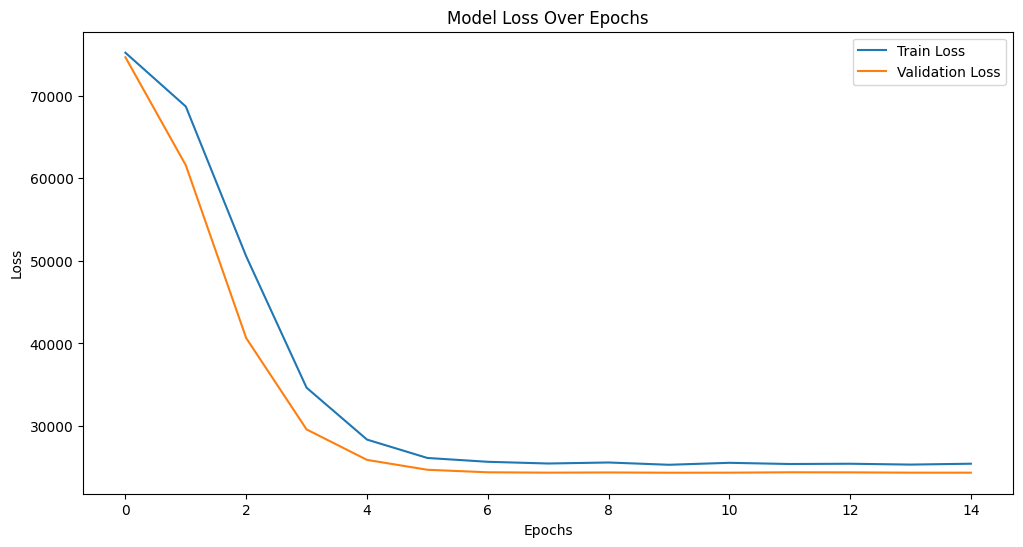

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


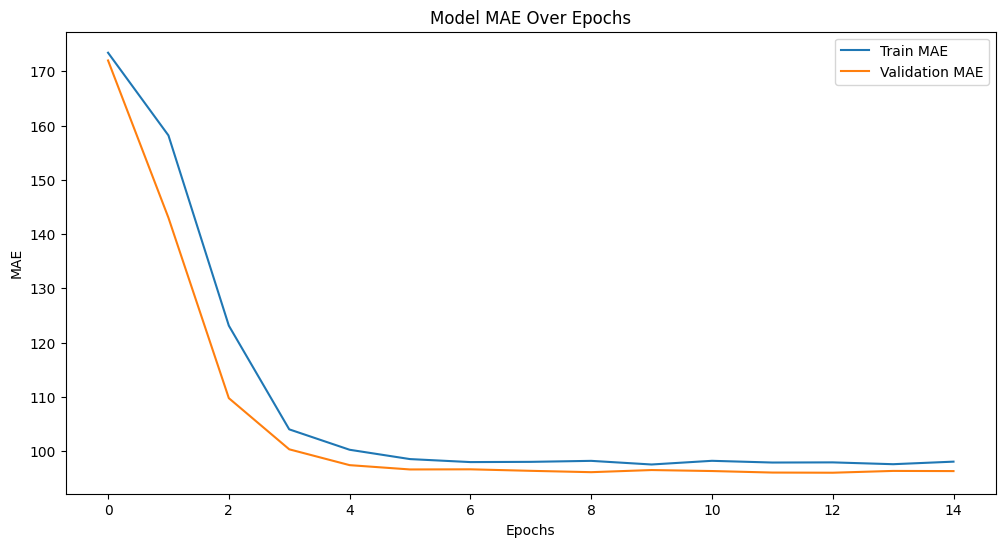

In [ ]:

plt.figure(figsize=(12, 6))
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

# Analyze Predictions

In [ ]:
y_pred = model.predict(X_test)

y_test_df = pd.DataFrame(y_test, columns=target_columns).reset_index(drop=True)
y_pred_df = pd.DataFrame(y_pred, columns=target_columns)

from sklearn.metrics import mean_absolute_error

mae_per_category = {}
for col in target_columns:
    mae = mean_absolute_error(y_test_df[col], y_pred_df[col])
    mae_per_category[col] = mae
    print(f"MAE for {col}: {mae:.4f}")

84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
MAE for Potential_Savings_Groceries: 264.4664
MAE for Potential_Savings_Transport: 135.2279
MAE for Potential_Savings_Eating_Out: 77.1866
MAE for Potential_Savings_Entertainment: 76.1647
MAE for Potential_Savings_Utilities: 129.3491
MAE for Potential_Savings_Healthcare: 14.0970
MAE for Potential_Savings_Education: 28.9768
MAE for Potential_Savings_Miscellaneous: 43.7318


Actual vs. Predicted Savings Scatter Plots

84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


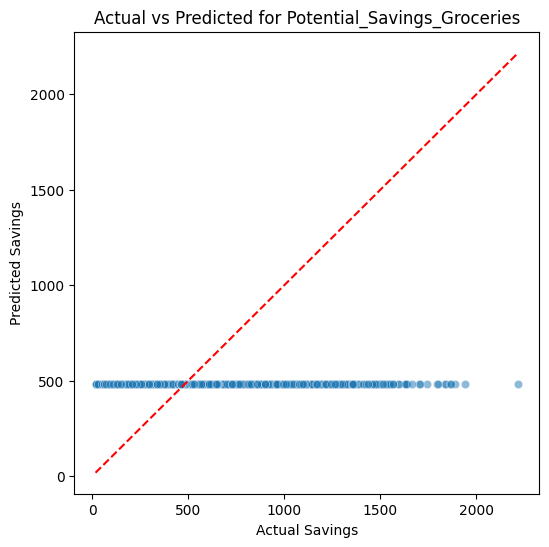

Metrics for Potential_Savings_Groceries:
  Mean Squared Error (MSE): 114306.10
  Mean Absolute Error (MAE): 264.47
  R-squared (R2 Score): -0.00



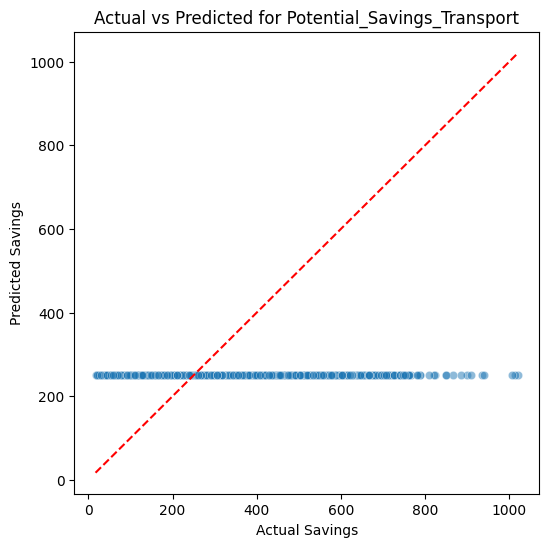

Metrics for Potential_Savings_Transport:
  Mean Squared Error (MSE): 29070.15
  Mean Absolute Error (MAE): 135.23
  R-squared (R2 Score): -0.00



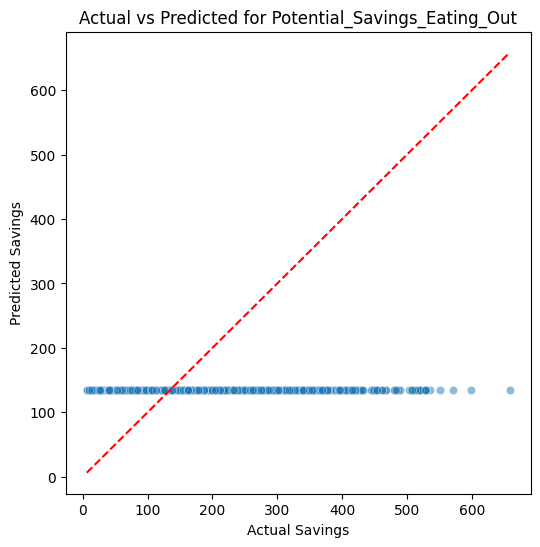

Metrics for Potential_Savings_Eating_Out:
  Mean Squared Error (MSE): 10080.97
  Mean Absolute Error (MAE): 77.19
  R-squared (R2 Score): -0.00



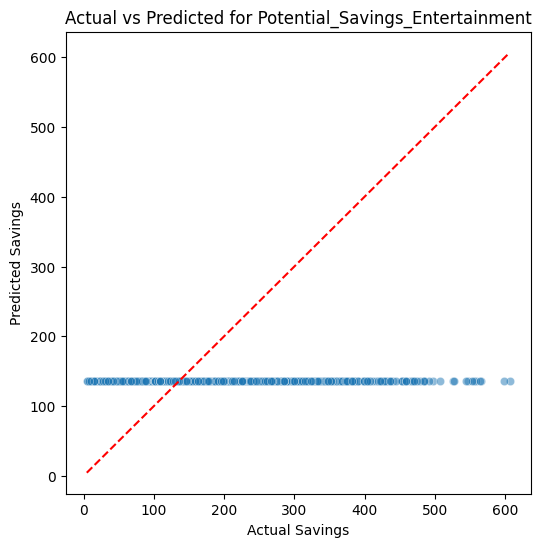

Metrics for Potential_Savings_Entertainment:
  Mean Squared Error (MSE): 9682.78
  Mean Absolute Error (MAE): 76.16
  R-squared (R2 Score): -0.00



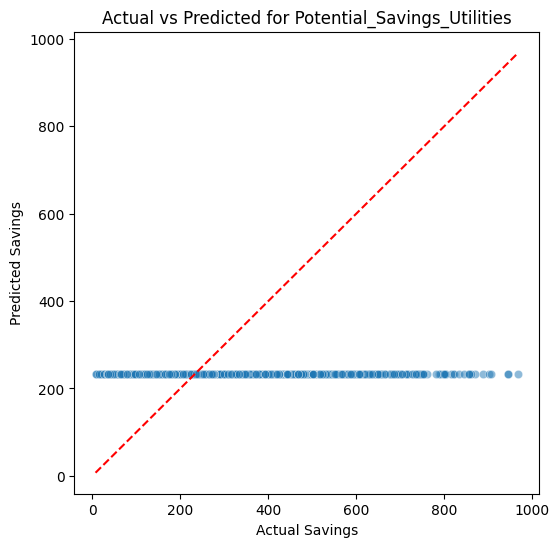

Metrics for Potential_Savings_Utilities:
  Mean Squared Error (MSE): 27378.16
  Mean Absolute Error (MAE): 129.35
  R-squared (R2 Score): -0.00



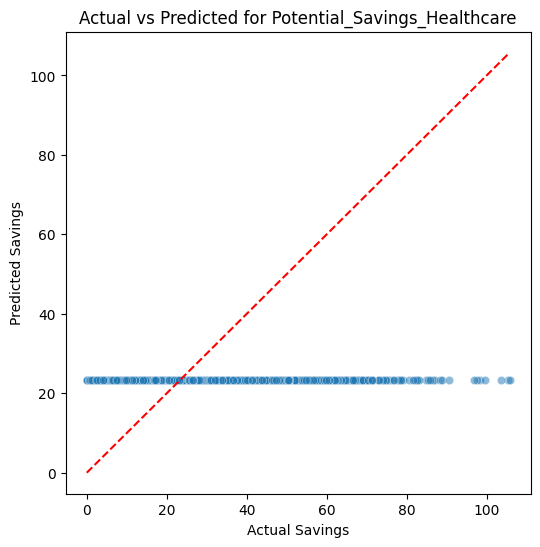

Metrics for Potential_Savings_Healthcare:
  Mean Squared Error (MSE): 311.86
  Mean Absolute Error (MAE): 14.10
  R-squared (R2 Score): -0.01



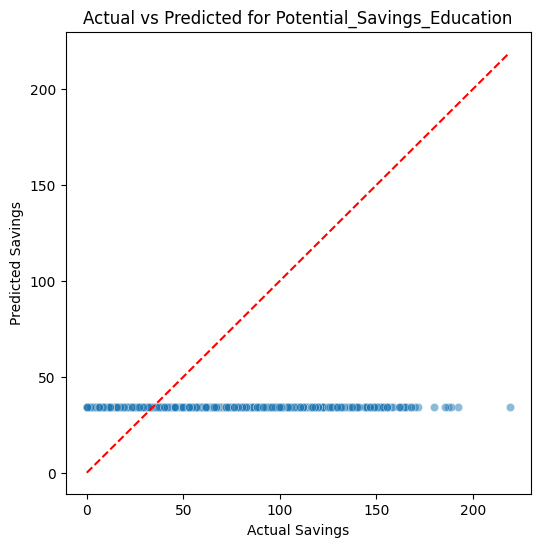

Metrics for Potential_Savings_Education:
  Mean Squared Error (MSE): 1345.48
  Mean Absolute Error (MAE): 28.98
  R-squared (R2 Score): -0.00



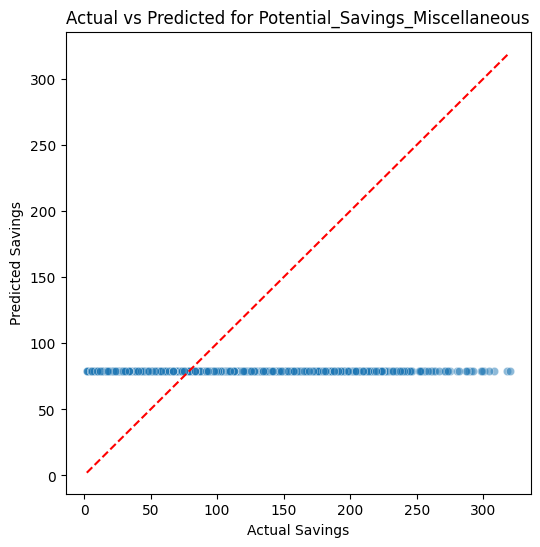

Metrics for Potential_Savings_Miscellaneous:
  Mean Squared Error (MSE): 3132.04
  Mean Absolute Error (MAE): 43.73
  R-squared (R2 Score): -0.00



In [ ]:
y_pred = model.predict(X_test)

y_test_df = pd.DataFrame(y_test, columns=target_columns).reset_index(drop=True)
y_pred_df = pd.DataFrame(y_pred, columns=target_columns)


for col in target_columns:
    plt.figure(figsize=(6, 6))
    sns.scatterplot(x=y_test_df[col], y=y_pred_df[col], alpha=0.5)
    plt.plot([y_test_df[col].min(), y_test_df[col].max()],
             [y_test_df[col].min(), y_test_df[col].max()],
             'r--')  
    plt.title(f'Actual vs Predicted for {col}')
    plt.xlabel('Actual Savings')
    plt.ylabel('Predicted Savings')
    plt.show()
    mse = mean_squared_error(y_test_df[col], y_pred_df[col])
    mae = mean_absolute_error(y_test_df[col], y_pred_df[col])
    r2 = r2_score(y_test_df[col], y_pred_df[col])
    
    print(f'Metrics for {col}:')
    print(f'  Mean Squared Error (MSE): {mse:.2f}')
    print(f'  Mean Absolute Error (MAE): {mae:.2f}')
    print(f'  R-squared (R2 Score): {r2:.2f}\n')


Observation:¶

Groceries:

Transport:

Eating Out:

Entertainment:

Utilities:

Healthcare:

Education:

Miscellaneous:


# Prediction Error Distribution

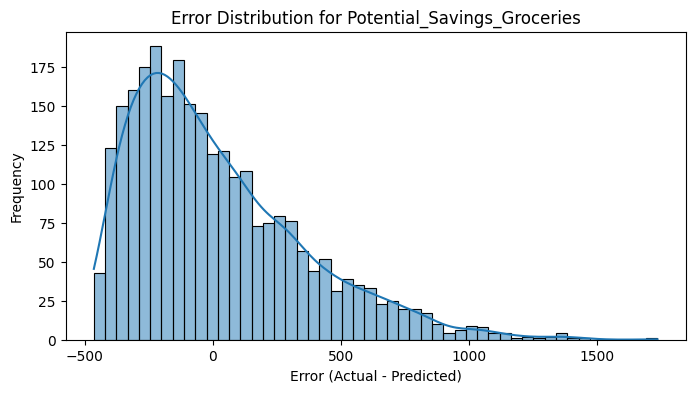

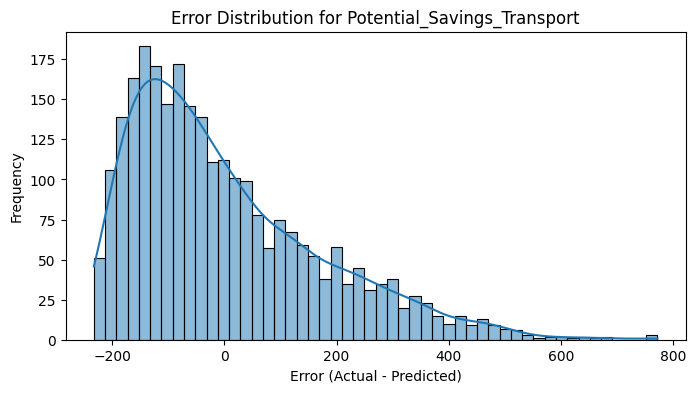

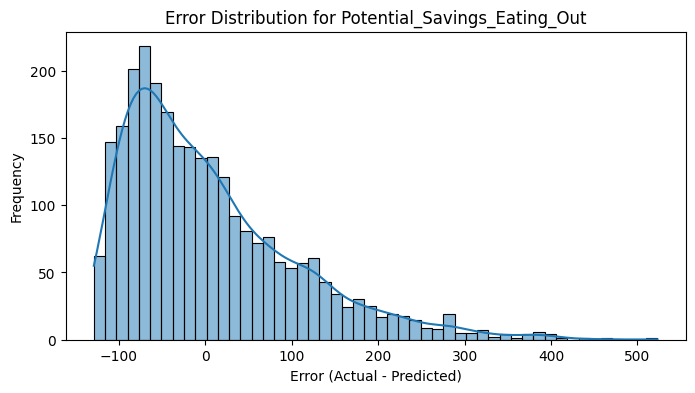

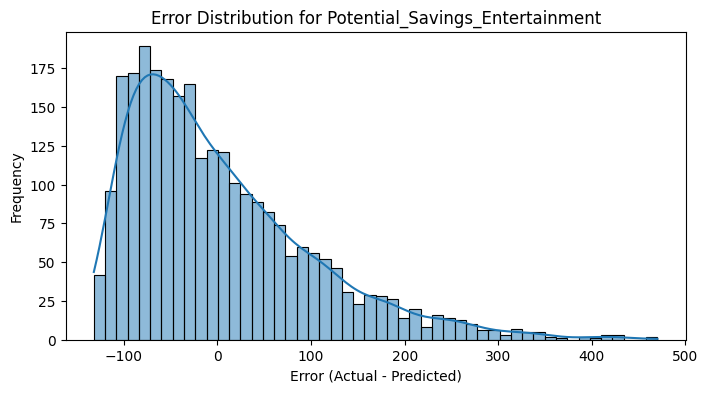

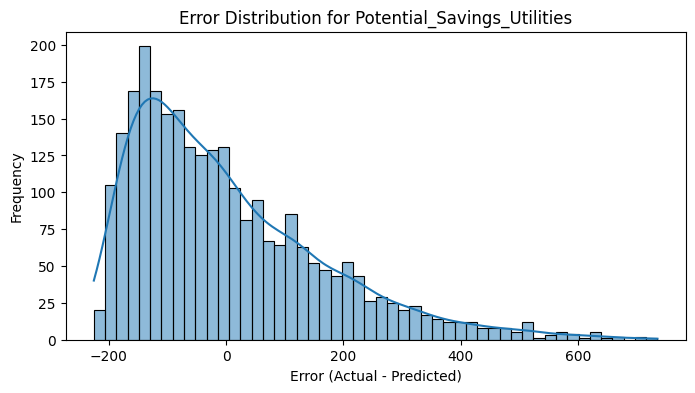

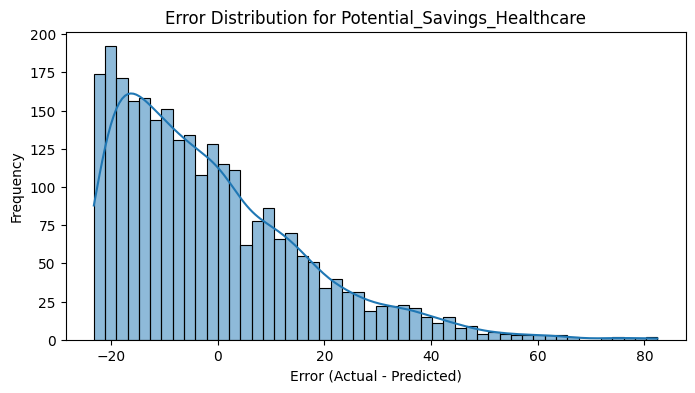

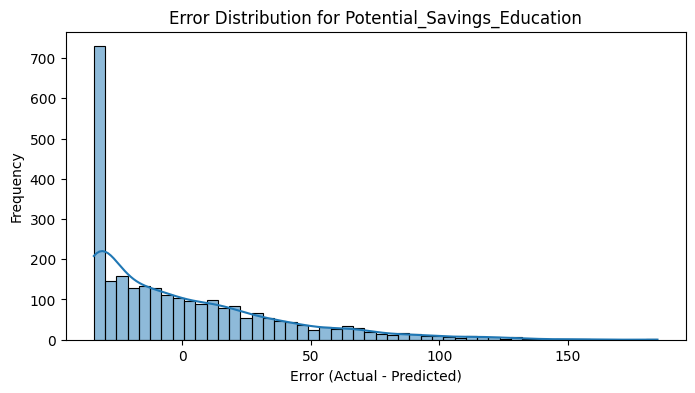

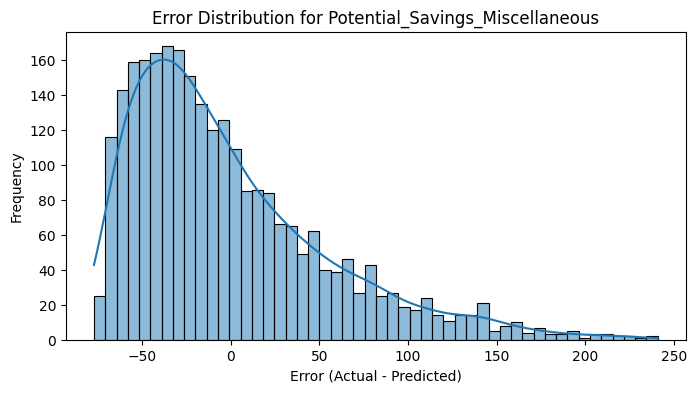

In [ ]:
errors = y_test_df - y_pred_df


for col in target_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(errors[col], bins=50, kde=True)
    plt.title(f'Error Distribution for {col}')
    plt.xlabel('Error (Actual - Predicted)')
    plt.ylabel('Frequency')
    plt.show()

Observation:¶

Groceries:

Transport:

Eating Out:

Entertainment:

Utilities:

Healthcare:

Education:

Miscellaneous:


# Residual Plots

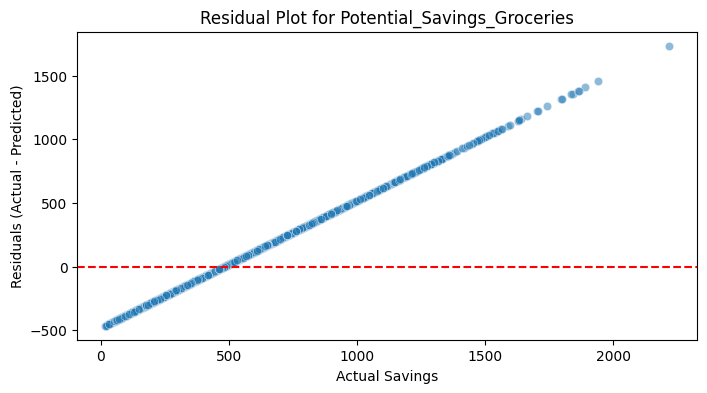

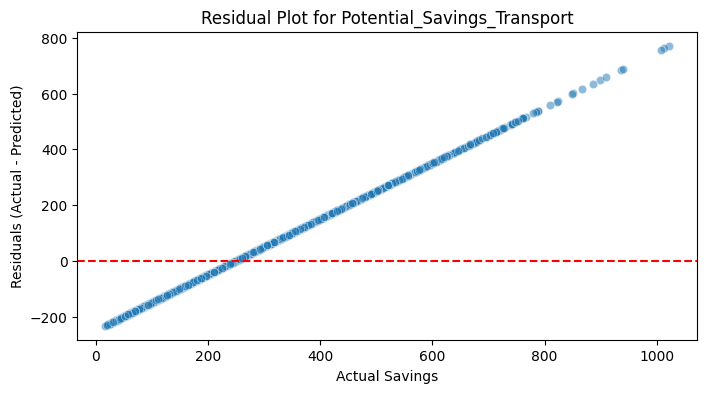

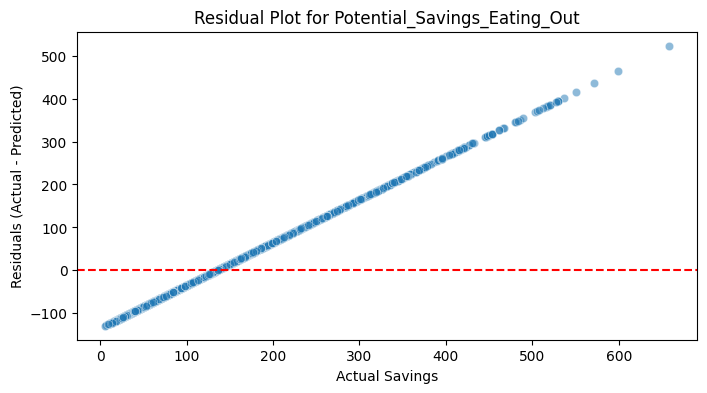

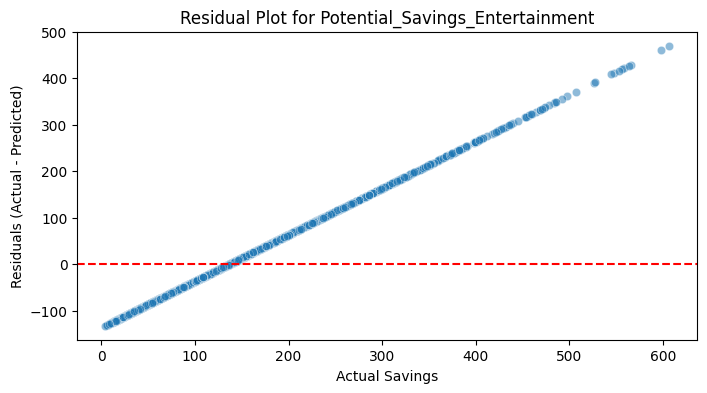

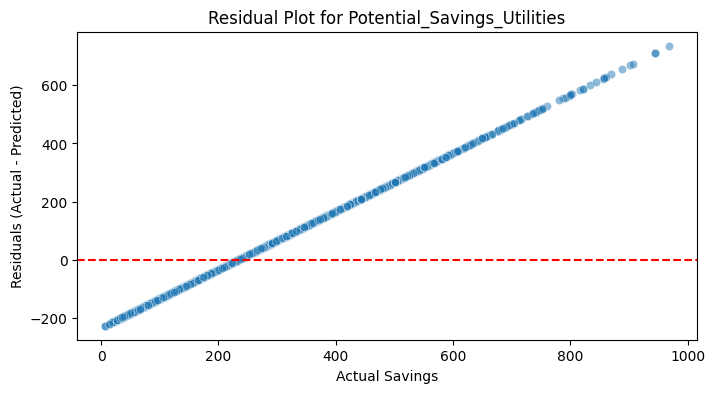

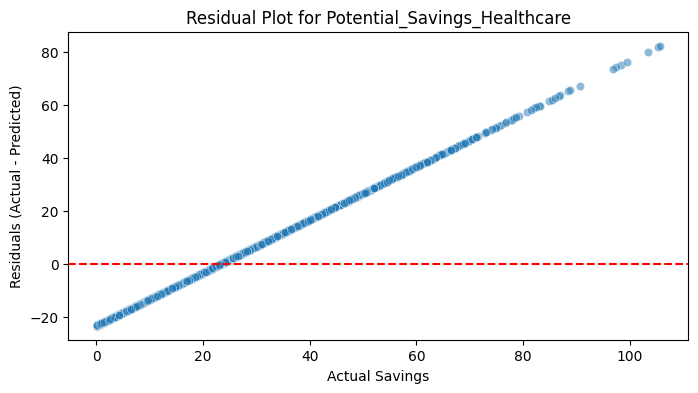

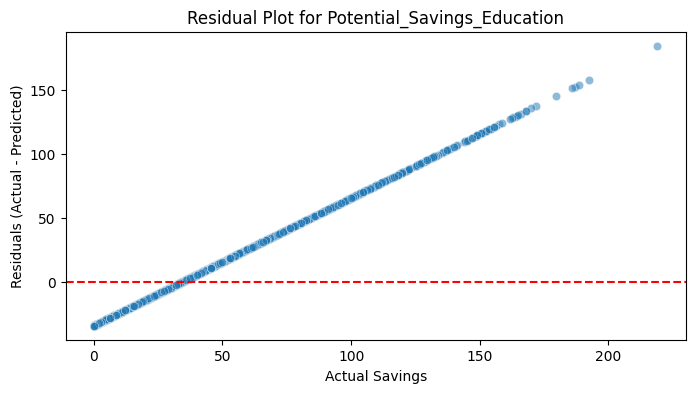

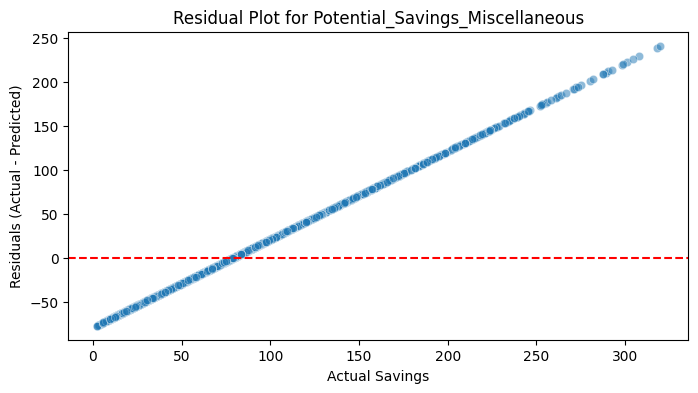

In [ ]:
for col in target_columns:
    plt.figure(figsize=(8, 4))
    sns.scatterplot(x=y_test_df[col], y=errors[col], alpha=0.5)
    plt.axhline(0, color='red', linestyle='--')
    plt.title(f'Residual Plot for {col}')
    plt.xlabel('Actual Savings')
    plt.ylabel('Residuals (Actual - Predicted)')
    plt.show()

Observation:¶

Groceries:

Transport:

Eating Out:

Entertainment:

Utilities:

Healthcare:

Education:

Miscellaneous:


# Correlation Matrix of Errors

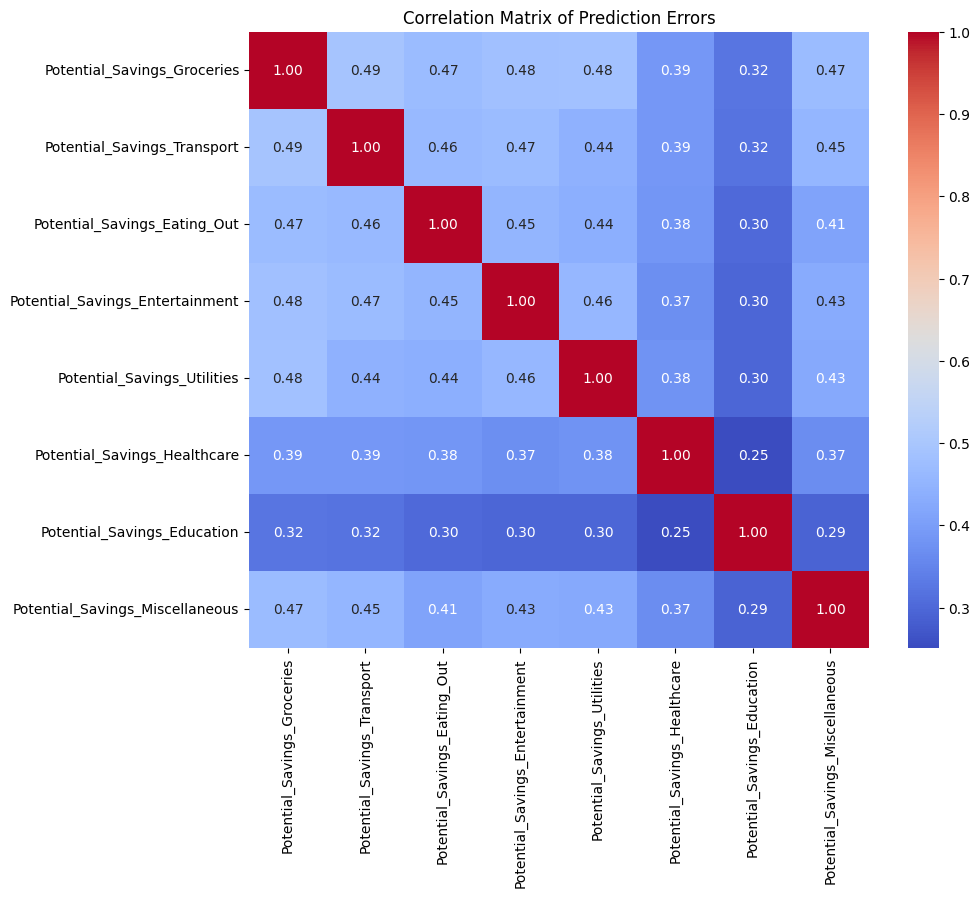

In [ ]:
error_corr = errors.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(error_corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Prediction Errors')
plt.show()

Observations¶
Potential_Savings_Groceries:

Highest correlation with Potential_Savings_Education (0.32) and Potential_Savings_Miscellaneous (0.30).
Low correlation with Potential_Savings_Eating_Out (0.06).
Potential_Savings_Transport:

Moderate correlation with Potential_Savings_Utilities (0.13) and Potential_Savings_Eating_Out (0.22).
Low correlation with Potential_Savings_Miscellaneous (0.14).
Potential_Savings_Eating_Out:

Strongest correlation with Potential_Savings_Utilities (0.29).
Minimal correlation with Potential_Savings_Healthcare (0.06) and Potential_Savings_Miscellaneous (0.06).
Potential_Savings_Entertainment:

Moderate correlation with Potential_Savings_Transport (0.25).
Very low correlation with Potential_Savings_Healthcare (-0.04).
Potential_Savings_Utilities:

Highest correlation with Potential_Savings_Eating_Out (0.29).
Low correlation with Potential_Savings_Education (0.11).
Potential_Savings_Healthcare:

Highest correlation with Potential_Savings_Education (0.15) and Potential_Savings_Miscellaneous (0.24).
Negative correlation with Potential_Savings_Entertainment (-0.04).
Potential_Savings_Education:

Highest correlation with Potential_Savings_Groceries (0.32).
Minimal correlation with Potential_Savings_Eating_Out (0.06).
Potential_Savings_Miscellaneous:

Highest correlation with Potential_Savings_Groceries (0.30) and Potential_Savings_Education (0.26).
Low correlation with Potential_Savings_Eating_Out (0.06).
Overall:

Most correlations are relatively low, indicating that the prediction errors for different categories are generally not strongly related.
The strongest relationships exist between categories like Groceries and Education, and Eating_Out and Utilities, suggesting some common error patterns.
Negative correlations, though rare, are present (e.g., between Entertainment and Healthcare), indicating an inverse relationship in their error patterns.

# Cluster Analysis Using K-Means

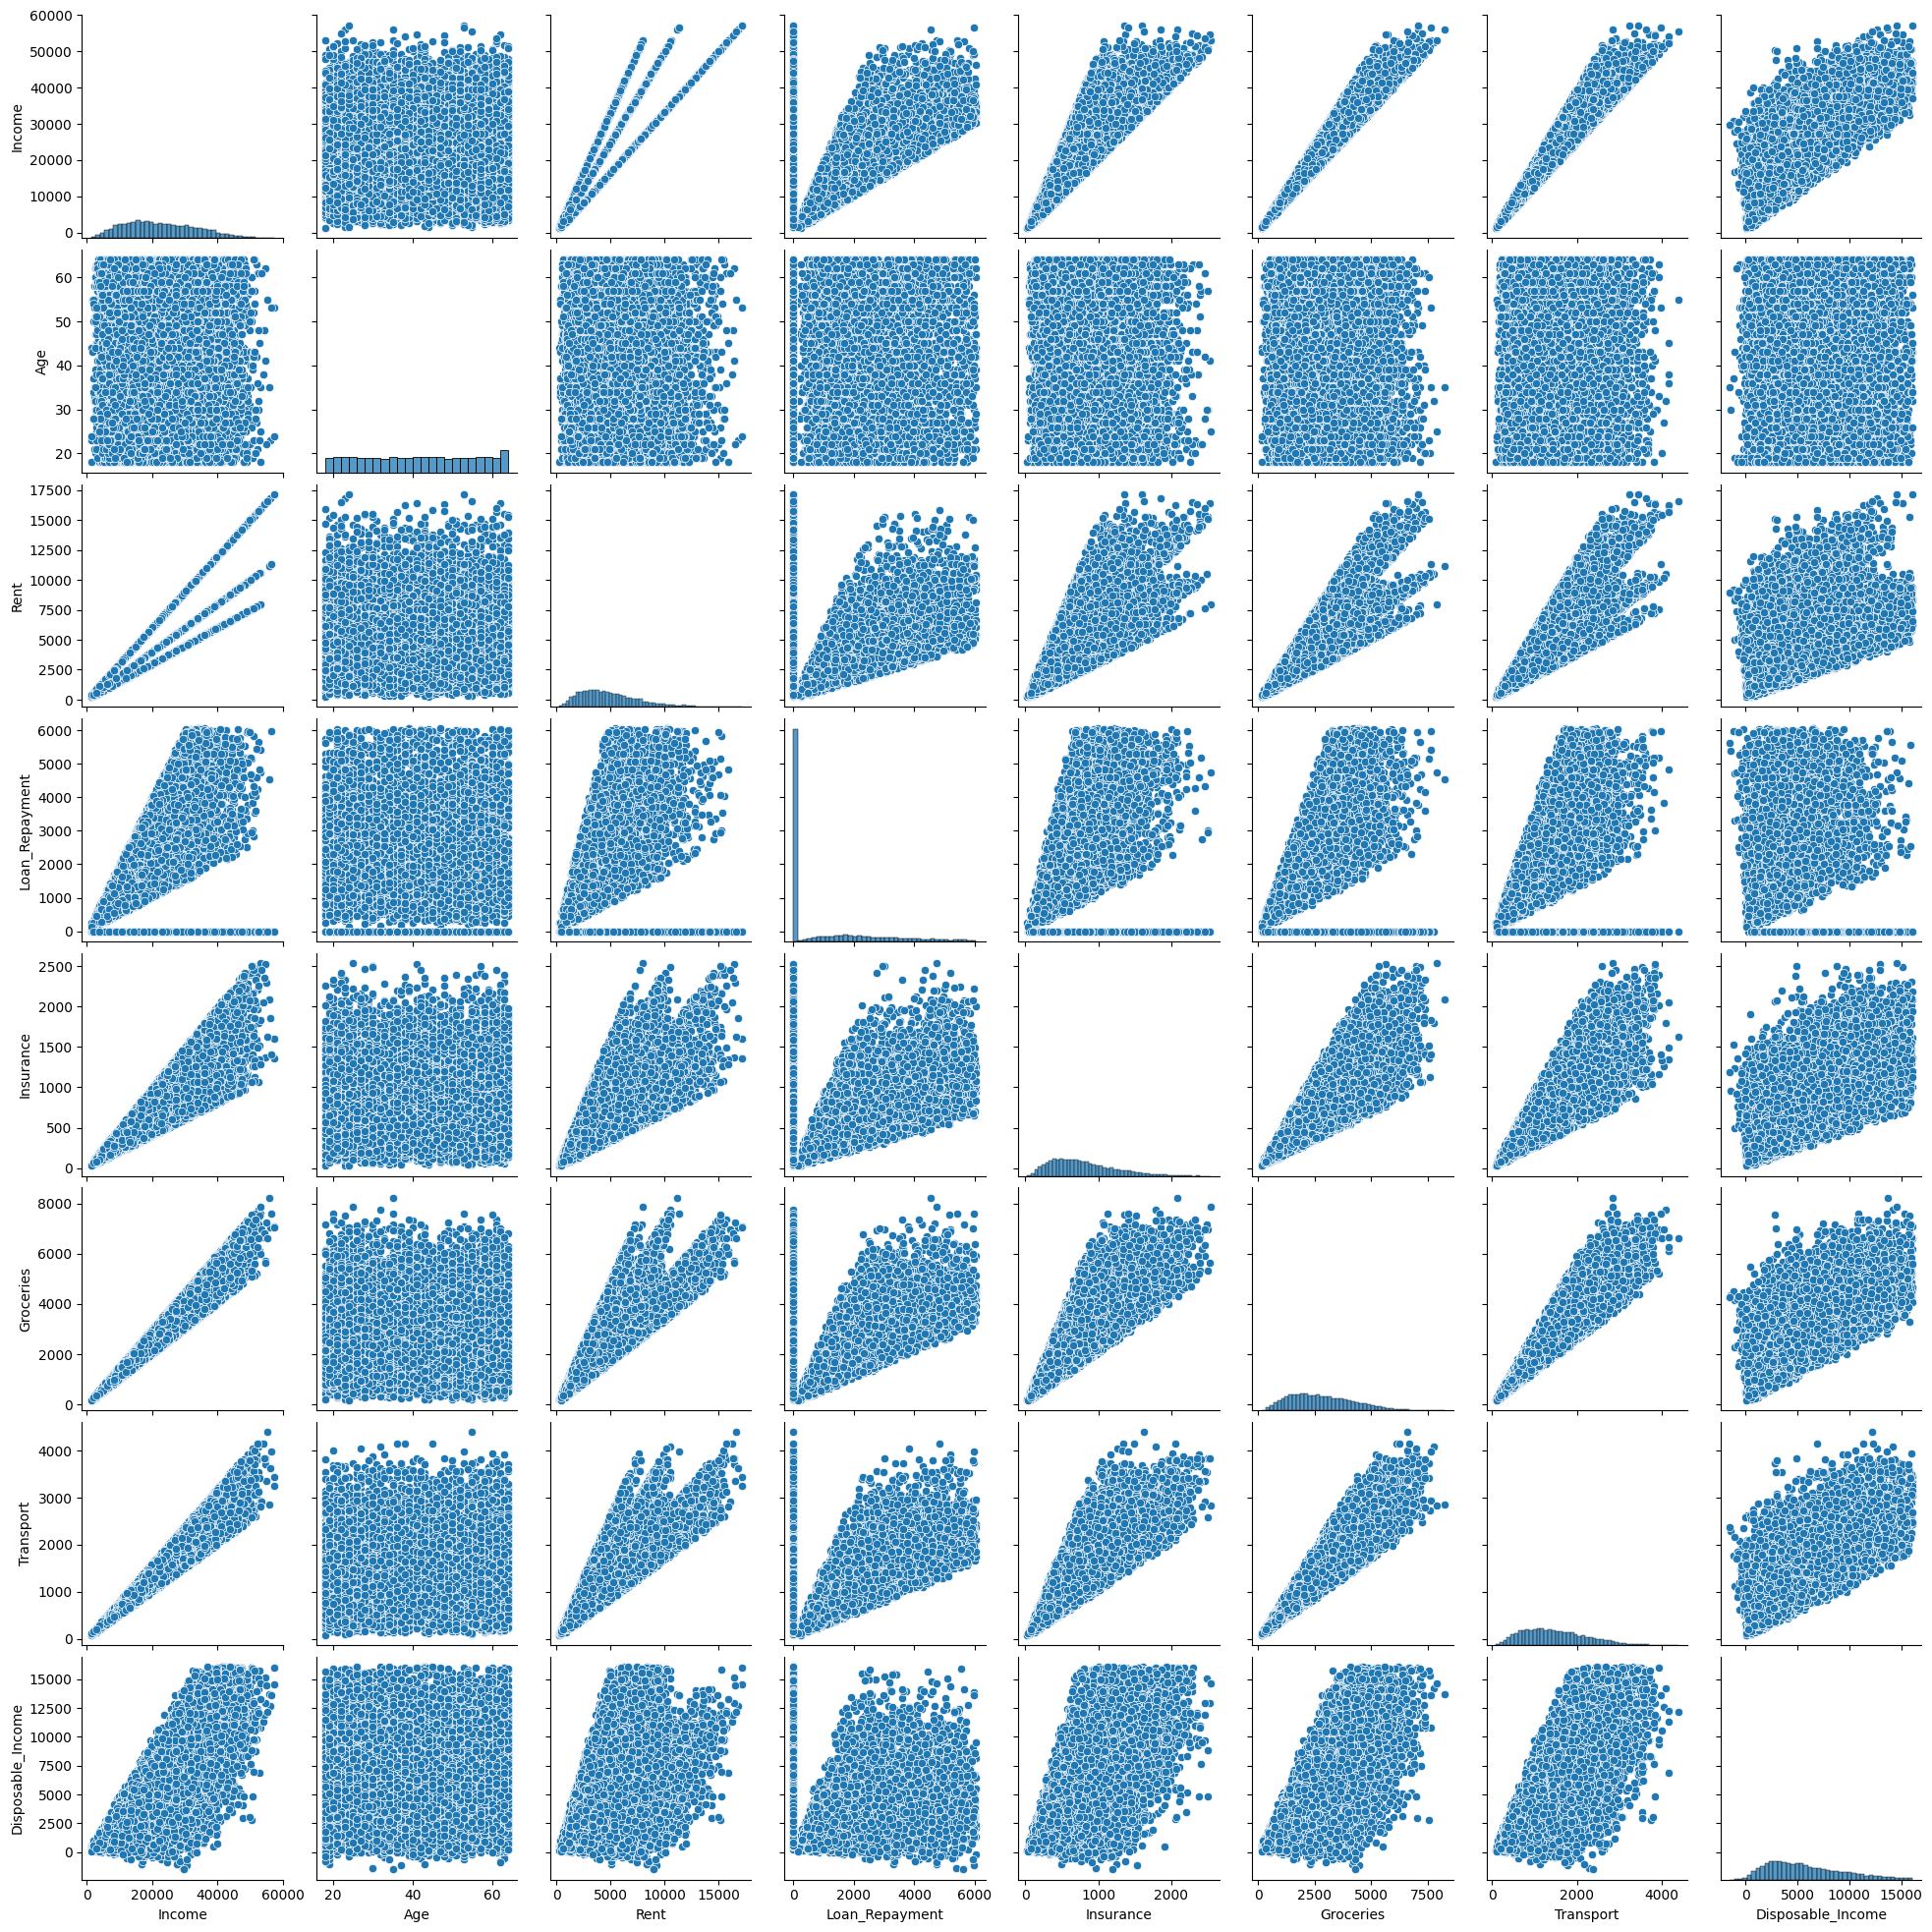

In [ ]:
columns_to_plot = ['Income', 'Age', 'Rent', 'Loan_Repayment', 'Insurance', 'Groceries', 'Transport', 'Disposable_Income']
sns.pairplot(df[columns_to_plot])
plt.show()


Conclusion:

We have successfully built and trained an attention-based neural network model to predict potential savings across various expense categories. The model leverages the attention mechanism to focus on the most relevant features, potentially enhancing its predictive capabilities.